subject\
condition: 1 = unbraced (normal walking), 2 = knee brace, 3 = ankle brace\
replication: Each subject repeated each condition approximately ten times\
leg: 1 = Left leg, 2 = Right leg\
joint: 1 = Ankle joint, 2 = Knee joint, 3 = Hip joint\
time: Normalized gait cycle time (in %)\
angle: 0° corresponds to a standing posture. Positive values represent flexion (bending), while negative values represent extension or plantar flexion.

In [2]:
import pandas as pd
df = pd.read_csv("./project_data/gait.csv")
# print(df.head(20))
print(df)
# print(df.columns)
print(df.dtypes)


        subject  condition  replication  leg  joint  time      angle
0             1          1            1    1      1     0   4.682881
1             1          1            1    1      1     1   5.073127
2             1          1            1    1      1     2   5.229774
3             1          1            1    1      1     3   5.083273
4             1          1            1    1      1     4   4.652399
...         ...        ...          ...  ...    ...   ...        ...
181795       10          3           10    2      3    96  29.778412
181796       10          3           10    2      3    97  29.247559
181797       10          3           10    2      3    98  28.796951
181798       10          3           10    2      3    99  28.432936
181799       10          3           10    2      3   100  28.136438

[181800 rows x 7 columns]
subject          int64
condition        int64
replication      int64
leg              int64
joint            int64
time             int64
angle  

### Restructure

In [100]:
df_prep = df.pivot_table(
    index=['subject', 'condition', 'replication', 'time'],
    columns=['leg', 'joint'],                              
    values='angle').reset_index()                                           

df_prep.columns = [
    f'leg{l}_joint{j}_angle' if isinstance(l, (int, float)) else l
    for l, j in df_prep.columns
]
df_prep

,subject,condition,replication,time,leg1_joint1_angle,leg1_joint2_angle,leg1_joint3_angle,leg2_joint1_angle,leg2_joint2_angle,leg2_joint3_angle
0,1,1,1,0,4.682881,3.693683,16.607868,5.015829,2.244425,18.948290
1,1,1,1,1,5.073127,4.258876,16.851029,5.291201,3.381678,19.265300
2,1,1,1,2,5.229774,5.346945,17.170098,5.410528,4.925566,19.600469
3,1,1,1,3,5.083273,6.769831,17.504693,5.270628,6.623978,19.871755
4,1,1,1,4,4.652399,8.351716,17.806602,4.814143,8.268602,20.016564
...,...,...,...,...,...,...,...,...,...,...
30295,10,3,10,96,5.469052,0.964147,25.046914,-4.136161,2.616228,29.778412
30296,10,3,10,97,5.994900,-1.377103,24.753520,-4.050542,0.721412,29.247559
30297,10,3,10,98,6.625519,-2.884798,24.636438,-3.933841,-0.629712,28.796951
30298,10,3,10,99,7.293149,-3.532651,24.695275,-3.837398,-1.438054,28.432936


In [101]:
df_prep = (df_prep.groupby(['subject', 'condition', 'replication'], as_index=False).mean(numeric_only=True))
df_prep = df_prep.drop(columns=['time'])
df_prep

,subject,condition,replication,leg1_joint1_angle,leg1_joint2_angle,leg1_joint3_angle,leg2_joint1_angle,leg2_joint2_angle,leg2_joint3_angle
0,1,1,1,7.850984,21.860145,4.597241,7.061943,22.231482,5.737394
1,1,1,2,7.003371,22.046200,2.934972,7.019926,24.393793,7.028008
2,1,1,3,6.907690,21.322701,4.043684,6.819900,23.229125,5.152094
3,1,1,4,6.380351,21.382904,4.930818,6.854509,23.377511,6.430136
4,1,1,5,6.618724,20.029062,4.116368,6.731278,21.839641,5.738954
...,...,...,...,...,...,...,...,...,...
295,10,3,6,4.898748,16.617524,14.213398,-4.118666,15.443605,12.678103
296,10,3,7,4.279994,17.544801,12.398080,-4.005039,15.673333,12.378648
297,10,3,8,4.972162,16.358994,13.095796,-4.031724,15.479382,11.532245
298,10,3,9,5.038511,18.387504,13.683937,-3.851888,15.695331,11.396588


In [102]:
df_prep['ankle_diff'] = df_prep['leg2_joint1_angle'] - df_prep['leg1_joint1_angle']
df_prep['knee_diff']  = df_prep['leg2_joint2_angle'] - df_prep['leg1_joint2_angle']
df_prep['hip_diff']   = df_prep['leg2_joint3_angle'] - df_prep['leg1_joint3_angle']
df_prep

,subject,condition,replication,leg1_joint1_angle,leg1_joint2_angle,leg1_joint3_angle,leg2_joint1_angle,leg2_joint2_angle,leg2_joint3_angle,ankle_diff,knee_diff,hip_diff
0,1,1,1,7.850984,21.860145,4.597241,7.061943,22.231482,5.737394,-0.789041,0.371337,1.140153
1,1,1,2,7.003371,22.046200,2.934972,7.019926,24.393793,7.028008,0.016555,2.347593,4.093037
2,1,1,3,6.907690,21.322701,4.043684,6.819900,23.229125,5.152094,-0.087790,1.906423,1.108410
3,1,1,4,6.380351,21.382904,4.930818,6.854509,23.377511,6.430136,0.474158,1.994607,1.499318
4,1,1,5,6.618724,20.029062,4.116368,6.731278,21.839641,5.738954,0.112555,1.810579,1.622586
...,...,...,...,...,...,...,...,...,...,...,...,...
295,10,3,6,4.898748,16.617524,14.213398,-4.118666,15.443605,12.678103,-9.017414,-1.173919,-1.535295
296,10,3,7,4.279994,17.544801,12.398080,-4.005039,15.673333,12.378648,-8.285033,-1.871468,-0.019432
297,10,3,8,4.972162,16.358994,13.095796,-4.031724,15.479382,11.532245,-9.003886,-0.879612,-1.563550
298,10,3,9,5.038511,18.387504,13.683937,-3.851888,15.695331,11.396588,-8.890399,-2.692173,-2.287350


### EDA

In [103]:
print(df_prep.shape)

(300, 12)


Since the dataset is small and prone to overfitting, I may apply regularization in the following process.

In [104]:
print(df_prep.dtypes)

subject                int64
condition              int64
replication            int64
leg1_joint1_angle    float64
leg1_joint2_angle    float64
leg1_joint3_angle    float64
leg2_joint1_angle    float64
leg2_joint2_angle    float64
leg2_joint3_angle    float64
ankle_diff           float64
knee_diff            float64
hip_diff             float64
dtype: object


In [98]:
print(df_prep[df_prep['subject'] == 1])

    subject  condition  replication  leg1_joint1_angle  leg1_joint2_angle  \
0         1          1            1           7.850984          21.860145   
1         1          1            2           7.003371          22.046200   
2         1          1            3           6.907690          21.322701   
3         1          1            4           6.380351          21.382904   
4         1          1            5           6.618724          20.029062   
5         1          1            6           7.000177          21.232840   
6         1          1            7           7.163482          21.752690   
7         1          1            8           6.987139          21.653898   
8         1          1            9           7.046419          20.893777   
9         1          1           10           6.950427          21.228568   
10        1          2            1           7.674093          20.650967   
11        1          2            2           7.532093          21.946555   

In [91]:
print(df_prep['leg1_joint1_angle'].describe())
# print(df_prep['leg1_joint2_angle'].describe())
# print(df_prep['leg1_joint3_angle'].describe())
# print(df_prep['leg1_joint1_angle'].describe())
# print(df_prep['leg2_joint2_angle'].describe())
# print(df_prep['leg2_joint3_angle'].describe())
print(df_prep['ankle_diff'].describe())
# print(df_prep['knee_diff'].describe())
# print(df_prep['hip_diff'].describe())

## negative angle means hyperextension

count    300.000000
mean       5.161283
std        1.574655
min        0.323233
25%        4.266238
50%        5.258992
75%        6.254865
max        9.648354
Name: leg1_joint1_angle, dtype: float64
count    300.000000
mean      -1.765787
std        4.132999
min      -11.015165
25%       -4.252435
50%       -0.972602
75%        0.493236
max        7.352222
Name: ankle_diff, dtype: float64


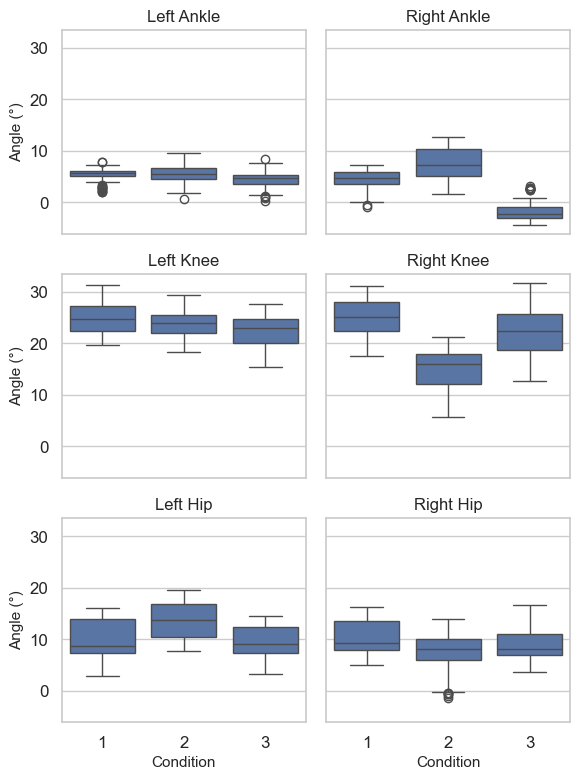

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

leg1_cols = ['leg1_joint1_angle', 'leg1_joint2_angle', 'leg1_joint3_angle']
leg2_cols = ['leg2_joint1_angle', 'leg2_joint2_angle', 'leg2_joint3_angle']
titles = ['Ankle', 'Knee', 'Hip']


fig, axes = plt.subplots(3, 2, figsize=(6,8), sharex=True, sharey=True)

for i in range(3):
    sns.boxplot(x='condition', y=leg1_cols[i], data=df_prep,ax=axes[i, 0])
    axes[i, 0].set_title(f"Left {titles[i]}", fontsize=12)
    axes[i, 0].set_xlabel('') 
    axes[i, 0].set_ylabel('Angle (°)', fontsize=11)

    sns.boxplot(x='condition', y=leg2_cols[i], data=df_prep,ax=axes[i, 1])
    axes[i, 1].set_title(f"Right {titles[i]}", fontsize=12)
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')


for ax in axes[-1, :]:
    ax.set_xlabel('Condition', fontsize=11)

plt.tight_layout()
plt.show()


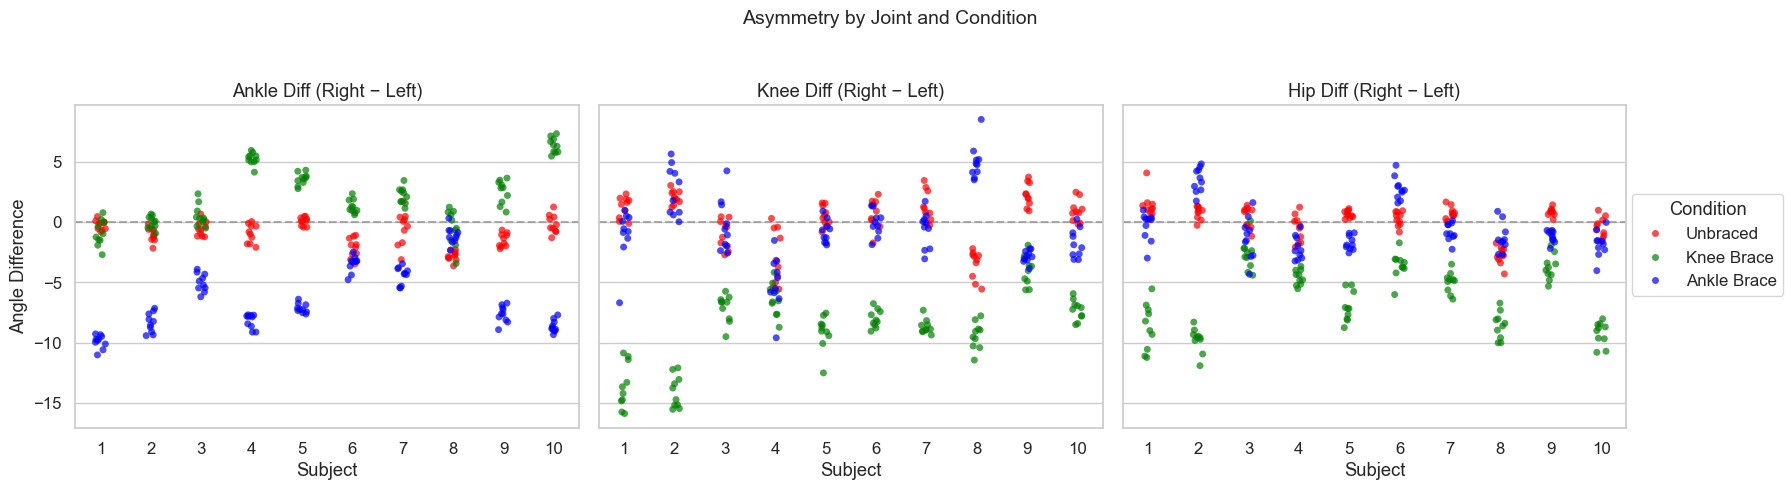

In [93]:
palette = {
    1: 'RED', 
    2: 'GREEN', 
    3: 'BLUE' 
}

diff_vars = ['ankle_diff', 'knee_diff', 'hip_diff']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, var in zip(axes, diff_vars):
    sns.stripplot(
        data=df_prep,
        x='subject',
        y=var,
        hue='condition',
        palette=palette,
        jitter=True,
        alpha=0.7,
        ax=ax
    )
    ax.axhline(0, color='gray', linestyle='--', alpha=0.6)
    ax.set_title(f'{var.replace("_", " ").title()} (Right − Left)')
    ax.set_xlabel('Subject')
    ax.set_ylabel('Angle Difference')
    ax.legend_.remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['Unbraced', 'Knee Brace', 'Ankle Brace'], title='Condition', loc='center right')

plt.suptitle('Asymmetry by Joint and Condition', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.92, 0.95])
plt.show()


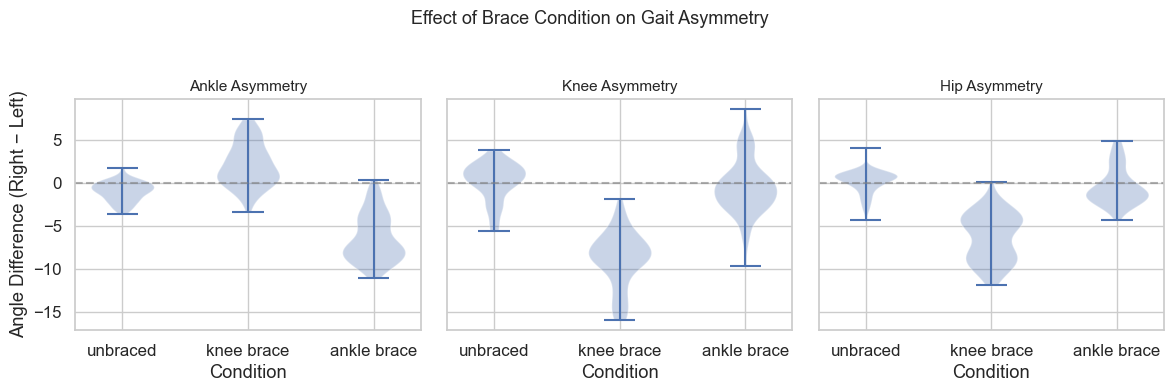

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

joints = ['ankle_diff', 'knee_diff', 'hip_diff']
titles = ['Ankle Asymmetry', 'Knee Asymmetry', 'Hip Asymmetry']

for ax, joint, title in zip(axes, joints, titles):
    dataset = [
        df_prep[df_prep['condition'] == 1][joint].values,
        df_prep[df_prep['condition'] == 2][joint].values,
        df_prep[df_prep['condition'] == 3][joint].values
    ]

    ax.violinplot(dataset=dataset)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['unbraced', 'knee brace', 'ankle brace'])
    ax.set_title(title, fontsize=11)
    ax.axhline(0, color='gray', linestyle='--', alpha=0.6)
    ax.set_xlabel('Condition')
    if joint == 'ankle_diff':
        ax.set_ylabel('Angle Difference (Right − Left)')

plt.suptitle('Effect of Brace Condition on Gait Asymmetry', fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


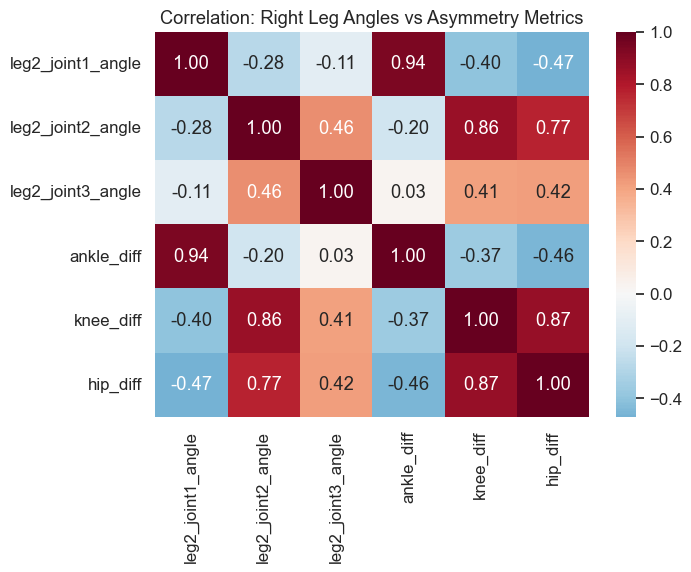

In [47]:
cols = ['leg2_joint1_angle', 'leg2_joint2_angle', 'leg2_joint3_angle', 'ankle_diff', 'knee_diff', 'hip_diff']
corr = df_prep[cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(
    corr,
    annot=True,
    cmap='RdBu_r',
    center=0,
    fmt='.2f'
)
plt.title('Correlation: Right Leg Angles vs Asymmetry Metrics')
plt.show()


### Restructure 2.0

In [2]:
import pandas as pd
df = pd.read_csv("./data/gait.csv")

# agg_df = df.groupby(["subject", "condition", "replication", "leg", "joint"])["angle"].agg(
#     mean_angle="mean",
#     std_angle="std"
# ).reset_index()

agg_df = df.groupby(["subject", "condition", "replication", "leg", "joint"])["angle"].agg(
    mean_angle="mean",
    std_angle="std",
    min_angle="min",
    max_angle="max"
).reset_index()
agg_df["range_angle"] = agg_df["max_angle"] - agg_df["min_angle"]
# print(agg_df)

# df_prep = agg_df.pivot_table(
#     index=["subject", "condition", "replication"],
#     columns=["leg", "joint"],
#     values=["mean_angle", "std_angle"]
# )

df_prep = agg_df.pivot_table(
    index=["subject", "condition", "replication"],
    columns=["leg", "joint"],
    values=["mean_angle", "std_angle", "min_angle", "max_angle", "range_angle"]
)

# print(df_prep)

df_prep.columns = [
    f"leg{leg}_joint{joint}_{stat}"
    for stat, leg, joint in df_prep.columns
]
# print(df_prep.columns)

df_prep = df_prep.reset_index()

df_prep["ankle_diff"] = df_prep["leg1_joint1_mean_angle"] - df_prep["leg2_joint1_mean_angle"]
df_prep["knee_diff"]  = df_prep["leg1_joint2_mean_angle"] - df_prep["leg2_joint2_mean_angle"]
df_prep["hip_diff"]   = df_prep["leg1_joint3_mean_angle"] - df_prep["leg2_joint3_mean_angle"]

# print(df_prep.columns)
print(df_prep.head())


   subject  condition  replication  leg1_joint1_max_angle  \
0        1          1            1              13.369976   
1        1          1            2              13.221472   
2        1          1            3              12.662596   
3        1          1            4              11.780479   
4        1          1            5              13.014492   

   leg1_joint2_max_angle  leg1_joint3_max_angle  leg2_joint1_max_angle  \
0              62.239251              21.401424              13.584862   
1              64.317481              20.484142              11.865704   
2              62.805217              21.261535              13.877307   
3              65.160693              22.073713              13.019480   
4              62.903760              20.981106              12.816035   

   leg2_joint2_max_angle  leg2_joint3_max_angle  leg1_joint1_mean_angle  ...  \
0              62.445295              22.082553                7.850984  ...   
1              66.191037    

In [112]:
df_prep

,subject,condition,replication,leg1_joint1_max_angle,leg1_joint2_max_angle,leg1_joint3_max_angle,leg2_joint1_max_angle,leg2_joint2_max_angle,leg2_joint3_max_angle,leg1_joint1_mean_angle,...,leg2_joint3_range_angle,leg1_joint1_std_angle,leg1_joint2_std_angle,leg1_joint3_std_angle,leg2_joint1_std_angle,leg2_joint2_std_angle,leg2_joint3_std_angle,ankle_diff,knee_diff,hip_diff
0,1,1,1,13.369976,62.239251,21.401424,13.584862,62.445295,22.082553,7.850984,...,35.621442,5.137240,18.214232,12.563371,4.313286,18.466275,12.731324,0.789041,-0.371337,-1.140153
1,1,1,2,13.221472,64.317481,20.484142,11.865704,66.191037,24.109056,7.003371,...,37.310610,5.667427,19.048641,12.990357,4.114043,19.666292,12.736948,-0.016555,-2.347593,-4.093037
2,1,1,3,12.662596,62.805217,21.261535,13.877307,65.300057,23.434250,6.907690,...,39.638053,5.103548,18.669649,12.743381,4.944802,18.874316,13.457144,0.087790,-1.906423,-1.108410
3,1,1,4,11.780479,65.160693,22.073713,13.019480,65.802016,24.997317,6.380351,...,39.586723,4.719326,19.686662,12.886681,4.717388,18.796025,13.252426,-0.474158,-1.994607,-1.499318
4,1,1,5,13.014492,62.903760,20.981106,12.816035,64.093660,22.574356,6.618724,...,37.978543,4.705380,19.358362,12.718005,4.536131,18.954727,12.965368,-0.112555,-1.810579,-1.622586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10,3,6,13.017609,56.064845,30.151928,-1.094239,48.463338,30.487791,4.898748,...,42.540530,6.298306,18.545381,13.307980,1.553449,17.007664,14.396895,9.017414,1.173919,1.535295
296,10,3,7,11.694914,57.292146,29.139327,-1.286535,50.472537,30.956483,4.279994,...,43.708806,6.301778,19.202184,13.355621,1.427259,17.443724,14.927578,8.285033,1.871468,0.019432
297,10,3,8,13.694759,56.875396,27.898749,-0.785391,53.759707,32.190169,4.972162,...,45.579047,5.963640,19.295089,13.148104,2.237173,18.482571,15.458380,9.003886,0.879612,1.563550
298,10,3,9,12.680619,54.774227,28.833213,-0.964694,51.452044,30.351050,5.038511,...,42.756970,6.015162,18.102857,12.736032,1.856883,17.644235,14.903997,8.890399,2.692173,2.287350


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def group_ml_pipe(
    ModelClass, 
    param_grid, 
    X, y, groups,
    random_states=[0,1,2,3,4],
    test_size=0.2
):
    all_test_scores = []
    all_best_params = []
    results_per_rs = []

    for rs in random_states:
        print(f"\nRandom State = {42+42*rs} ")

        # get train & val set
        gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=42*rs)
        train_val_idx, test_idx = next(gss.split(X, y, groups))

        X_train_val = X.iloc[train_val_idx]
        y_train_val = y.iloc[train_val_idx]
        groups_train_val = groups.iloc[train_val_idx]

        X_test = X.iloc[test_idx]
        y_test = y.iloc[test_idx]

        # groupkfold CV train val
        kfold = GroupKFold(n_splits=5)
        grid = list(ParameterGrid(param_grid))

        val_scores_all_params = []
        train_scores_all_params = []

        for params in grid:
            fold_train_scores = []
            fold_val_scores = []

            for tr_idx, va_idx in kfold.split(X_train_val, y_train_val, groups_train_val):
                X_tr = X_train_val.iloc[tr_idx]
                X_va = X_train_val.iloc[va_idx]
                y_tr = y_train_val.iloc[tr_idx]
                y_va = y_train_val.iloc[va_idx]

                pipe = Pipeline([
                    ("scaler", StandardScaler()),
                    ("clf", ModelClass(**params))
                ])

                pipe.fit(X_tr, y_tr)
                train_pred = pipe.predict(X_tr)
                fold_train_scores.append(accuracy_score(y_tr, train_pred))
                val_pred = pipe.predict(X_va)
                fold_val_scores.append(accuracy_score(y_va, val_pred))
 
            
            train_scores_all_params.append(np.mean(fold_train_scores))
            val_scores_all_params.append(np.mean(fold_val_scores))

        # For overfitting curve later
        results_per_rs.append({
            "train_scores": train_scores_all_params,
            "val_scores": val_scores_all_params
        })
        
        # Best params
        best_idx = np.argmax(val_scores_all_params)
        best_params = grid[best_idx]
        all_best_params.append(best_params)

        print(f"Best params = {best_params}")
        print(f"Best val accuracy = {val_scores_all_params[best_idx]:.4f}")

        # Retrain on full train_val
        best_model = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", ModelClass(**best_params))
        ])
        best_model.fit(X_train_val, y_train_val)

        # Test
        y_test_pred = best_model.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_pred)
        all_test_scores.append(test_acc)

        print(f"Test accuracy = {test_acc:.4f}")

    # Final Result
    mean_test = np.mean(all_test_scores)
    print("\nFINAL RESULT")
    print("Test accuracies:", all_test_scores)
    print(f"Mean Test Accuracy = {mean_test:.4f}")

    return mean_test, all_test_scores, all_best_params, results_per_rs, grid

In [10]:
def xgb_pipe(
    param_grid, 
    X, y, groups,
    random_states=[0,1,2,3,4],
    test_size=0.2,
    early_stopping_rounds=50
):
    
    all_test_scores = []# 5 times test accuracy
    all_best_params = []# 5 times best parameters
    results_per_rs = []
    all_evals_results = []
    grid = list(ParameterGrid(param_grid))

    for rs in random_states:
        print(f"\nRandom State = {42+42*rs} ")

        # get test set
        gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=42*rs)
        train_val_idx, test_idx = next(gss.split(X, y, groups))

        X_train_val = X.iloc[train_val_idx]
        y_train_val = y.iloc[train_val_idx]
        groups_train_val = groups.iloc[train_val_idx]

        X_test = X.iloc[test_idx]
        y_test = y.iloc[test_idx]

        kfold = GroupKFold(n_splits=5)

        train_scores_all_params = []
        val_scores_all_params = []

        for params in grid:
            fold_train_scores = []
            fold_val_scores = []

            for tr_idx, va_idx in kfold.split(X_train_val, y_train_val, groups_train_val):
                X_tr = X_train_val.iloc[tr_idx]
                X_va = X_train_val.iloc[va_idx]
                y_tr = y_train_val.iloc[tr_idx]
                y_va = y_train_val.iloc[va_idx]

                # prepocess
                scaler = StandardScaler()
                X_tr_sc = scaler.fit_transform(X_tr)
                X_va_sc = scaler.transform(X_va)

                # XGBoost with early stopping
                model = xgb.XGBClassifier(
                    **params,
                    n_jobs=-1,
                    early_stopping_rounds=early_stopping_rounds
                )

                model.fit(
                    X_tr_sc, y_tr,
                    eval_set=[(X_va_sc, y_va)],
                    verbose=False
                )

                # Train accuracy
                y_tr_pred = model.predict(X_tr_sc)
                fold_train_scores.append(accuracy_score(y_tr, y_tr_pred))

                # Validation accuracy
                y_va_pred = model.predict(X_va_sc)
                fold_val_scores.append(accuracy_score(y_va, y_va_pred))

            train_scores_all_params.append(np.mean(fold_train_scores))
            val_scores_all_params.append(np.mean(fold_val_scores))

        # for overfitting curve
        results_per_rs.append({
            "train_scores": train_scores_all_params,
            "val_scores": val_scores_all_params
        })

        # Best params
        best_idx = np.argmax(val_scores_all_params)
        best_params = grid[best_idx]
        all_best_params.append(best_params)

        print(f"Best params = {best_params}")
        print(f"Best val accuracy = {val_scores_all_params[best_idx]:.4f}")

        # split train_val again to create a validation set for early stopping
        scaler = StandardScaler()
        X_train_val_sc = scaler.fit_transform(X_train_val)
        X_test_sc = scaler.transform(X_test)

        X_tr2, X_val2, y_tr2, y_val2 = train_test_split(
            X_train_val_sc, y_train_val, test_size=0.2, random_state=rs
        )

        final_model = xgb.XGBClassifier(
            **best_params,
            n_jobs=-1,
            early_stopping_rounds=early_stopping_rounds
        )

        final_model.fit(
            X_tr2, y_tr2,
            eval_set=[(X_tr2, y_tr2), (X_val2, y_val2)], 
            verbose=False
        )

        evals_result = final_model.evals_result()
        all_evals_results.append(evals_result)

        test_acc = accuracy_score(y_test, final_model.predict(X_test_sc))
        all_test_scores.append(test_acc)
        print(f"Test accuracy = {test_acc:.4f}")

    # Final summary
    print("\nFINAL RESULT")
    print("Test accuracies:", all_test_scores)
    print(f"Mean Test Accuracy = {np.mean(all_test_scores):.4f}")

    return np.mean(all_test_scores), all_test_scores, all_best_params, results_per_rs, grid, all_evals_results


In [6]:
# baseline
majority_class = y_train_val.value_counts().idxmax()
baseline_acc = (y_train_val == majority_class).mean()
print(f"Baseline Accuracy: {baseline_acc:.4f}")


NameError: name 'y_train_val' is not defined

### 1. All the data: left legs & right legs

In [11]:
X_all_data = df_prep[[
        'leg1_joint1_max_angle',
       'leg1_joint2_max_angle', 'leg1_joint3_max_angle',
       'leg2_joint1_max_angle', 'leg2_joint2_max_angle',
       'leg2_joint3_max_angle', 
        'leg1_joint1_mean_angle',
       'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
       'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
       'leg2_joint3_mean_angle', 
        'leg1_joint1_min_angle',
       'leg1_joint2_min_angle', 'leg1_joint3_min_angle',
       'leg2_joint1_min_angle', 'leg2_joint2_min_angle',
       'leg2_joint3_min_angle', 
        'leg1_joint1_range_angle',
       'leg1_joint2_range_angle', 'leg1_joint3_range_angle',
       'leg2_joint1_range_angle', 'leg2_joint2_range_angle',
       'leg2_joint3_range_angle', 
        'leg1_joint1_std_angle',
       'leg1_joint2_std_angle', 'leg1_joint3_std_angle',
       'leg2_joint1_std_angle', 'leg2_joint2_std_angle',
       'leg2_joint3_std_angle',
       'ankle_diff','knee_diff','hip_diff'
             ]]

y = df_prep['condition']
groups = df_prep['subject']

#### 1.1 Decision Tree

In [17]:


param_grids = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10]
}

mean_acc, test_scores, best_params, results_per_rs, grid = group_ml_pipe(
    DecisionTreeClassifier,
    param_grids,
    X_all_data, y, groups
)


Random State = 42 
Best params = {'max_depth': 3, 'min_samples_split': 2}
Best val accuracy = 1.0000
Test accuracy = 0.9833

Random State = 84 
Best params = {'max_depth': 3, 'min_samples_split': 2}
Best val accuracy = 1.0000
Test accuracy = 1.0000

Random State = 126 
Best params = {'max_depth': 7, 'min_samples_split': 2}
Best val accuracy = 1.0000
Test accuracy = 0.9833

Random State = 168 
Best params = {'max_depth': 3, 'min_samples_split': 2}
Best val accuracy = 1.0000
Test accuracy = 1.0000

Random State = 210 
Best params = {'max_depth': 3, 'min_samples_split': 2}
Best val accuracy = 1.0000
Test accuracy = 1.0000

FINAL RESULT
Test accuracies: [0.9833333333333333, 1.0, 0.9833333333333333, 1.0, 1.0]
Mean Test Accuracy = 0.9933


#### 1.2 Random Forest

In [21]:
param_grids = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [3, 5, 10],
    "max_features": [0.25, 0.5, 0.75, 1.0]
}

mean_acc, test_scores, best_params, results_per_rs, grid = group_ml_pipe(
    RandomForestClassifier,
    param_grids,
    X_all_data, y, groups
)


Random State = 42 
Best params = {'max_depth': 3, 'max_features': 0.25, 'n_estimators': 200}
Best val accuracy = 1.0000
Test accuracy = 1.0000

Random State = 84 
Best params = {'max_depth': 3, 'max_features': 0.25, 'n_estimators': 200}
Best val accuracy = 1.0000
Test accuracy = 1.0000

Random State = 126 
Best params = {'max_depth': 3, 'max_features': 0.25, 'n_estimators': 200}
Best val accuracy = 1.0000
Test accuracy = 1.0000

Random State = 168 
Best params = {'max_depth': 3, 'max_features': 0.25, 'n_estimators': 200}
Best val accuracy = 1.0000
Test accuracy = 1.0000

Random State = 210 
Best params = {'max_depth': 3, 'max_features': 0.25, 'n_estimators': 200}
Best val accuracy = 1.0000
Test accuracy = 1.0000

FINAL RESULT
Test accuracies: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Test Accuracy = 1.0000


#### 1.3 XGBoost


Random State = 42 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Best val accuracy = 1.0000


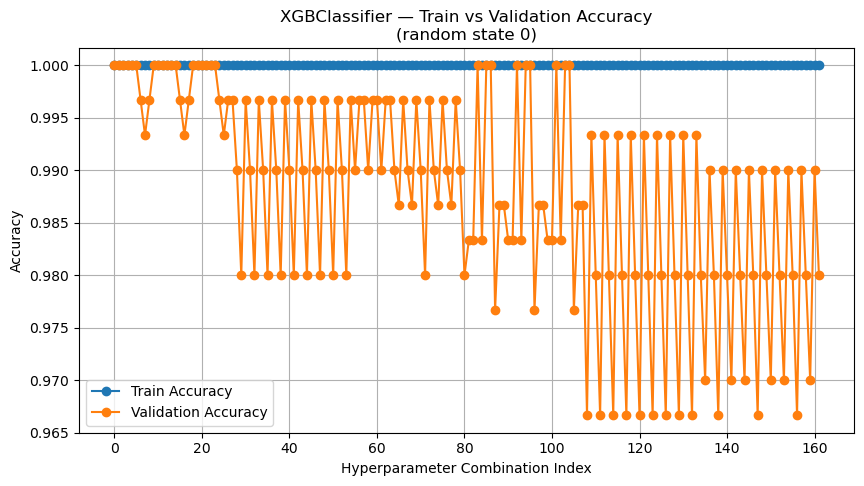

Test accuracy = 1.0000

Random State = 84 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best val accuracy = 1.0000


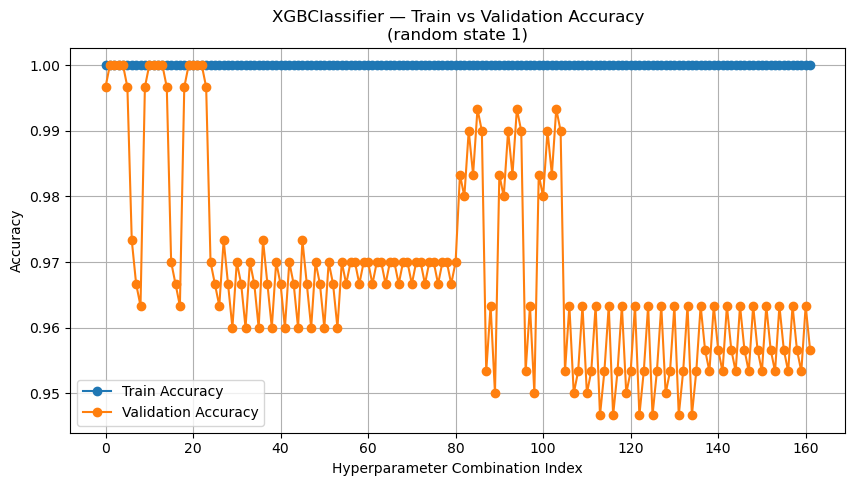

Test accuracy = 1.0000

Random State = 126 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Best val accuracy = 1.0000


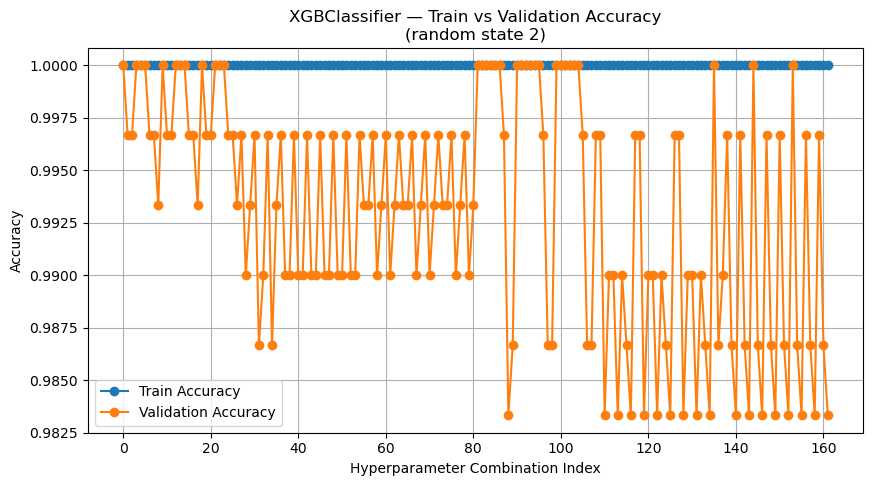

Test accuracy = 1.0000

Random State = 168 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Best val accuracy = 1.0000


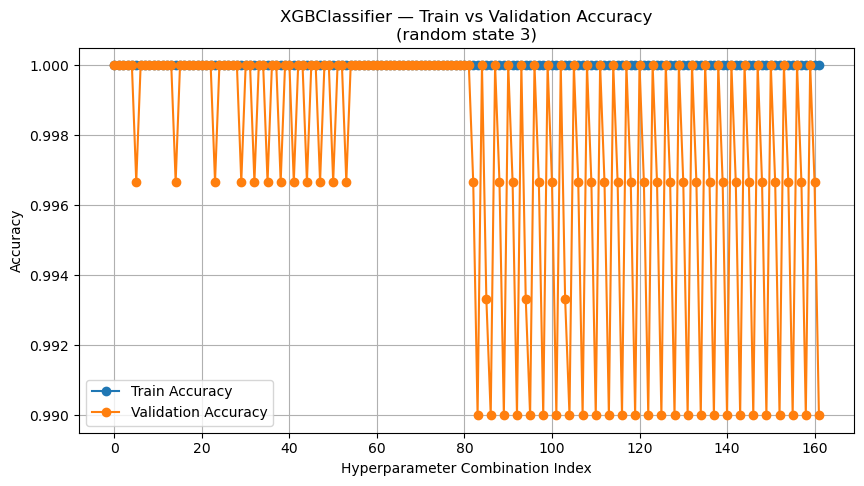

Test accuracy = 1.0000

Random State = 210 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Best val accuracy = 1.0000


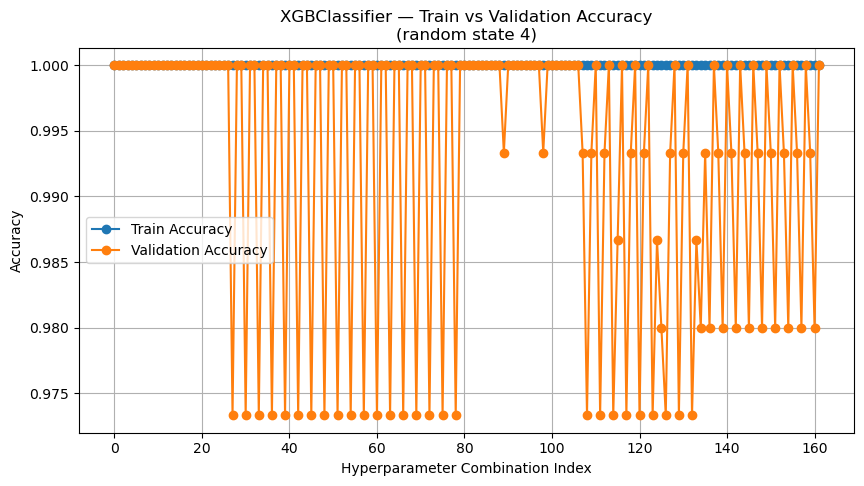

Test accuracy = 1.0000

FINAL RESULT
Test accuracies: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Test Accuracy = 1.0000


In [129]:
y = df_prep["condition"] - 1

param_grids = {
     "n_estimators": [300, 500, 800],
        "max_depth": [3, 5, 10],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.6, 0.8, 0.9],
        "colsample_bytree": [0.7, 1.0]
}

mean_acc, test_scores, best_params = run_model(
    xgb.XGBClassifier,
    param_grids,
    X_all_data, y, groups
)

#### 1.4 SVC


Random State = 42 
Best params = {'C': np.float64(10.0), 'gamma': np.float64(0.001)}
Best val accuracy = 1.0000


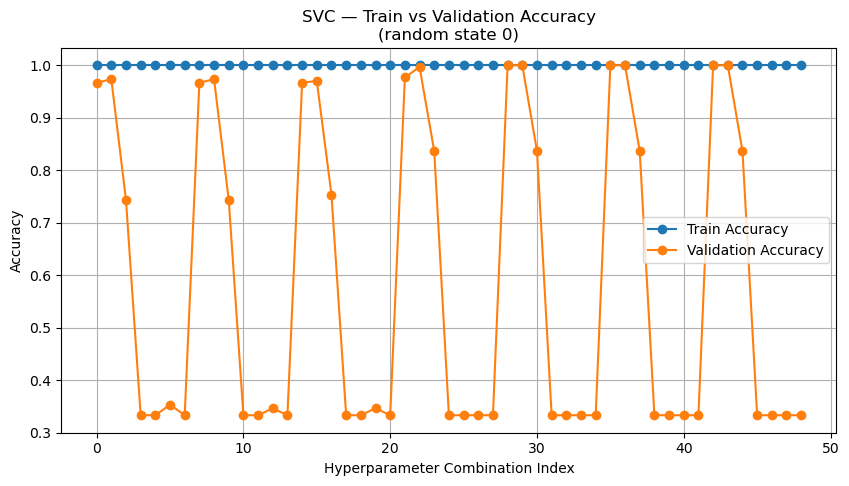

Test accuracy = 1.0000

Random State = 84 
Best params = {'C': np.float64(1.0), 'gamma': np.float64(0.01)}
Best val accuracy = 0.9833


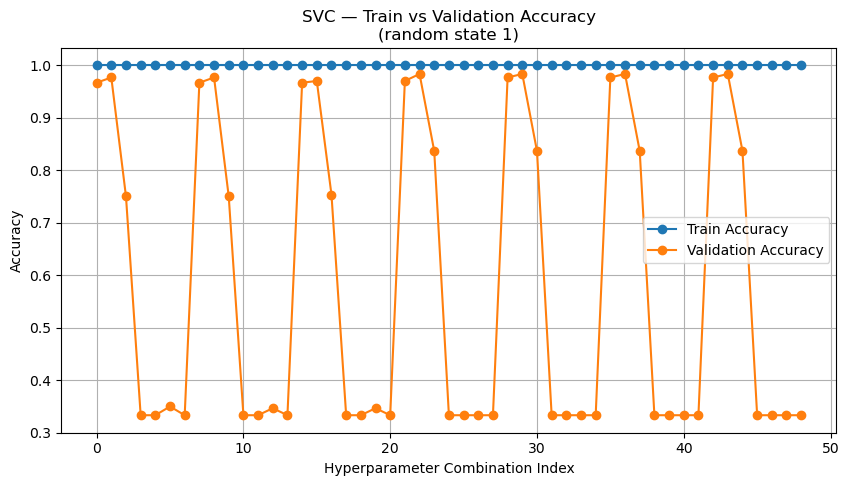

Test accuracy = 1.0000

Random State = 126 
Best params = {'C': np.float64(10.0), 'gamma': np.float64(0.001)}
Best val accuracy = 1.0000


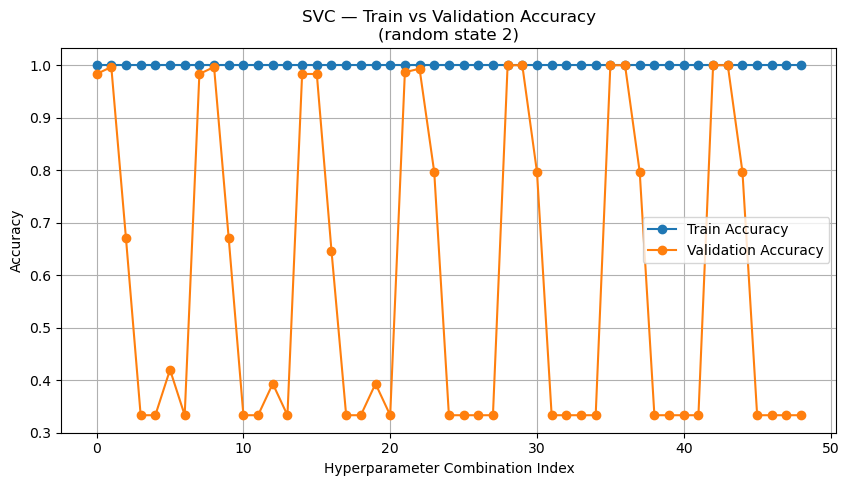

Test accuracy = 1.0000

Random State = 168 
Best params = {'C': np.float64(0.001), 'gamma': np.float64(0.001)}
Best val accuracy = 1.0000


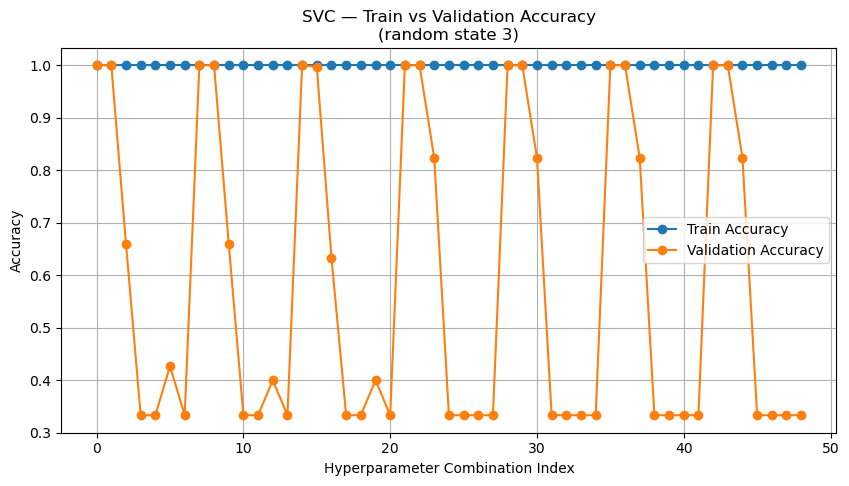

Test accuracy = 1.0000

Random State = 210 
Best params = {'C': np.float64(1.0), 'gamma': np.float64(0.001)}
Best val accuracy = 1.0000


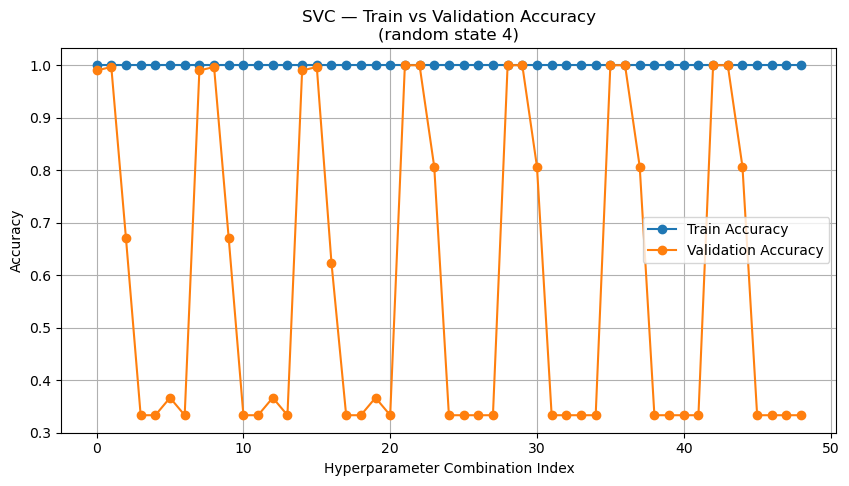

Test accuracy = 1.0000

FINAL RESULT
Test accuracies: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Test Accuracy = 1.0000


In [130]:
param_grids = {
     "C": np.logspace(-3,3,7),
    "gamma": np.logspace(-3, 3, 7)

}

mean_acc, test_scores, best_params = run_model(
    SVC,
    param_grids,
    X_all_data, y, groups
)

#### 1.5 Logistic Regression


Random State = 42 
Best params = {'C': np.float64(10.0), 'max_iter': 5000}
Best val accuracy = 0.9933


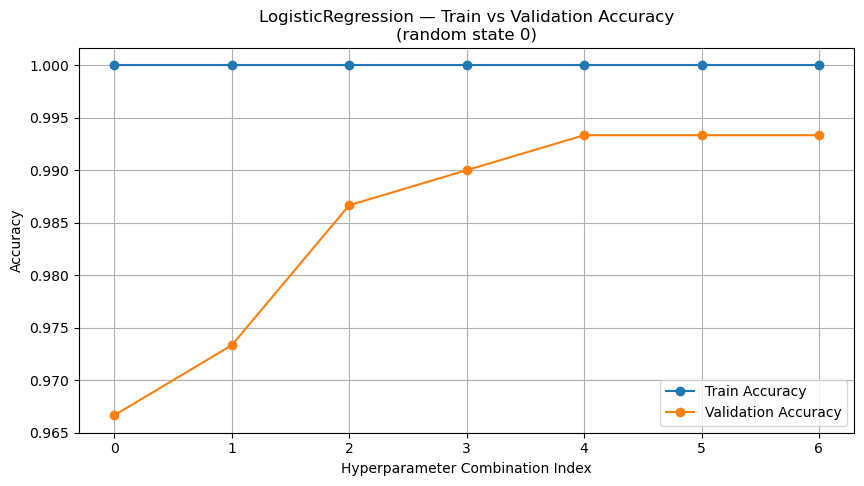

Test accuracy = 1.0000

Random State = 84 
Best params = {'C': np.float64(0.001), 'max_iter': 5000}
Best val accuracy = 0.9667


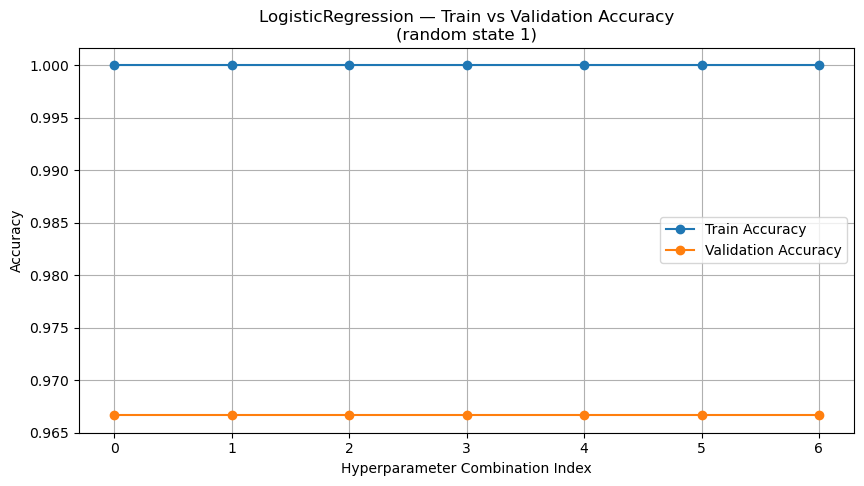

Test accuracy = 1.0000

Random State = 126 
Best params = {'C': np.float64(1.0), 'max_iter': 5000}
Best val accuracy = 0.9867


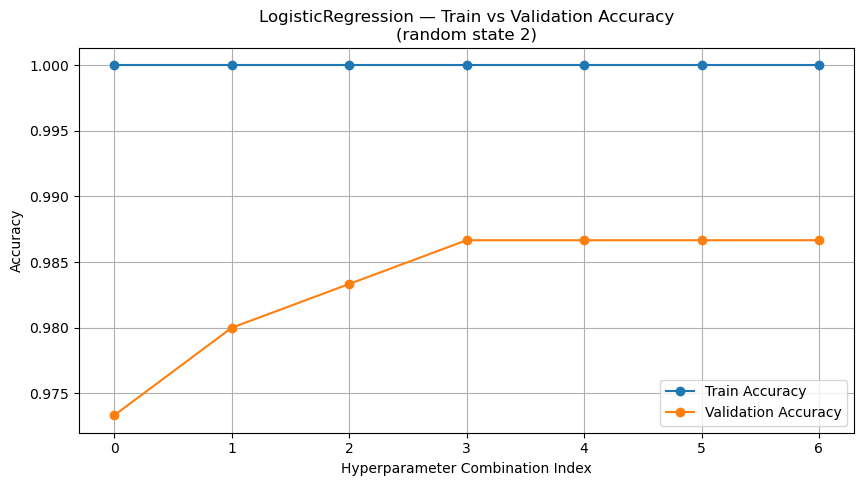

Test accuracy = 1.0000

Random State = 168 
Best params = {'C': np.float64(1.0), 'max_iter': 5000}
Best val accuracy = 0.9967


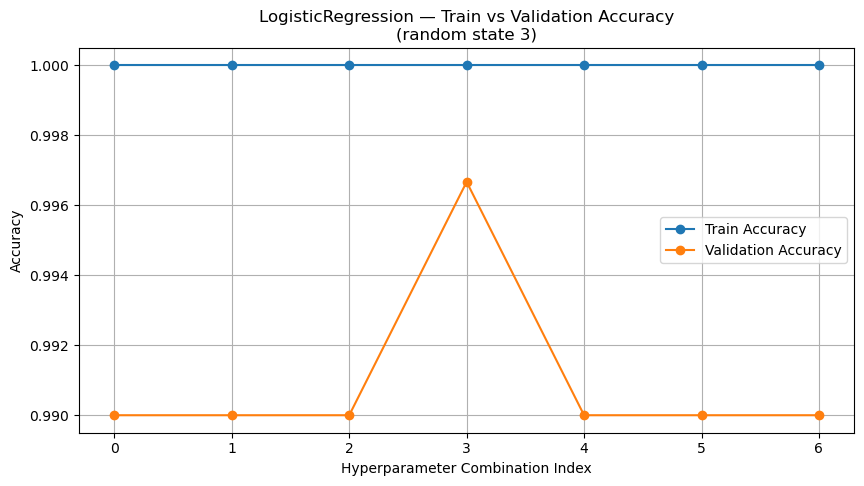

Test accuracy = 1.0000

Random State = 210 
Best params = {'C': np.float64(0.1), 'max_iter': 5000}
Best val accuracy = 1.0000


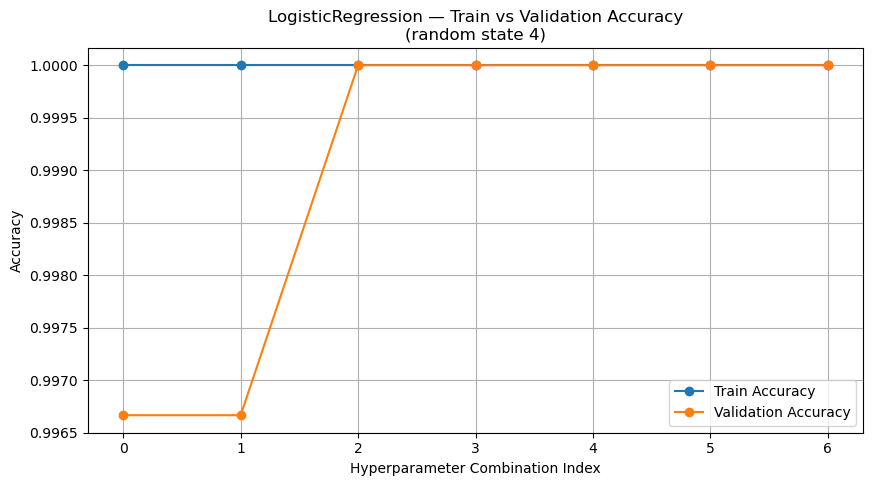

Test accuracy = 1.0000

FINAL RESULT
Test accuracies: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean Test Accuracy = 1.0000


In [131]:
param_grids = {
     "C": np.logspace(-3,3,7),
    "max_iter": [5000]

}

mean_acc, test_scores, best_params = run_model(
    LogisticRegression,
    param_grids,
    X_all_data, y, groups
)

### 2. all left legs data + 3 differences 

In [132]:
X = df_prep[[
        'leg1_joint1_max_angle',
       'leg1_joint2_max_angle', 'leg1_joint3_max_angle',
       # 'leg2_joint1_max_angle', 'leg2_joint2_max_angle',
       # 'leg2_joint3_max_angle', 
        'leg1_joint1_mean_angle',
       'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
       # 'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
       # 'leg2_joint3_mean_angle', 
        'leg1_joint1_min_angle',
       'leg1_joint2_min_angle', 'leg1_joint3_min_angle',
       # 'leg2_joint1_min_angle', 'leg2_joint2_min_angle',
       # 'leg2_joint3_min_angle', 
        'leg1_joint1_range_angle',
       'leg1_joint2_range_angle', 'leg1_joint3_range_angle',
       # 'leg2_joint1_range_angle', 'leg2_joint2_range_angle',
       # 'leg2_joint3_range_angle', 
        'leg1_joint1_std_angle',
       'leg1_joint2_std_angle', 'leg1_joint3_std_angle',
       # 'leg2_joint1_std_angle', 'leg2_joint2_std_angle',
       # 'leg2_joint3_std_angle',
       'ankle_diff','knee_diff','hip_diff'
             ]]

y = df_prep['condition']
groups = df_prep['subject']

#### 2.1 Decision Tree


Random State = 42 
Best params = {'max_depth': 3, 'min_samples_split': 5}
Best val accuracy = 0.7967


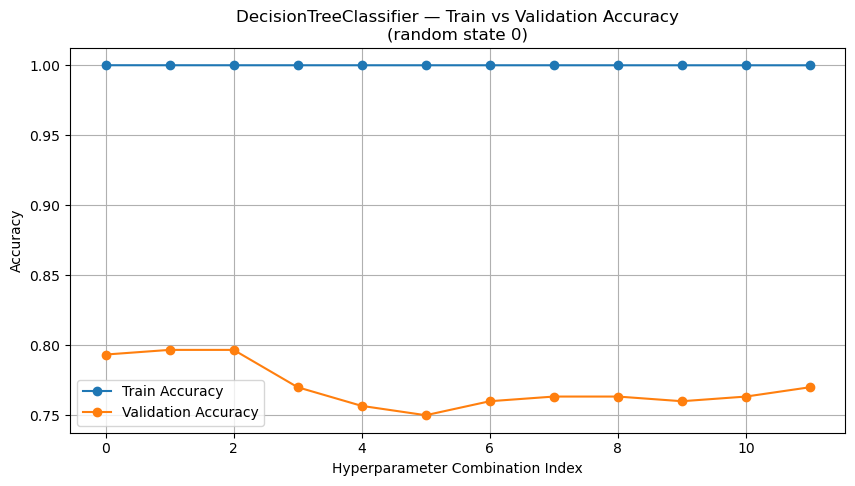

Test accuracy = 0.6167

Random State = 84 
Best params = {'max_depth': 7, 'min_samples_split': 2}
Best val accuracy = 0.7833


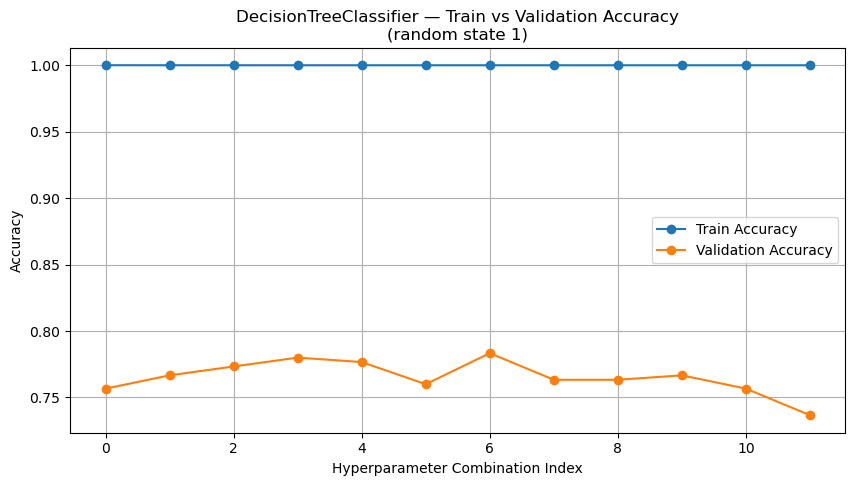

Test accuracy = 0.8500

Random State = 126 
Best params = {'max_depth': 10, 'min_samples_split': 2}
Best val accuracy = 0.7500


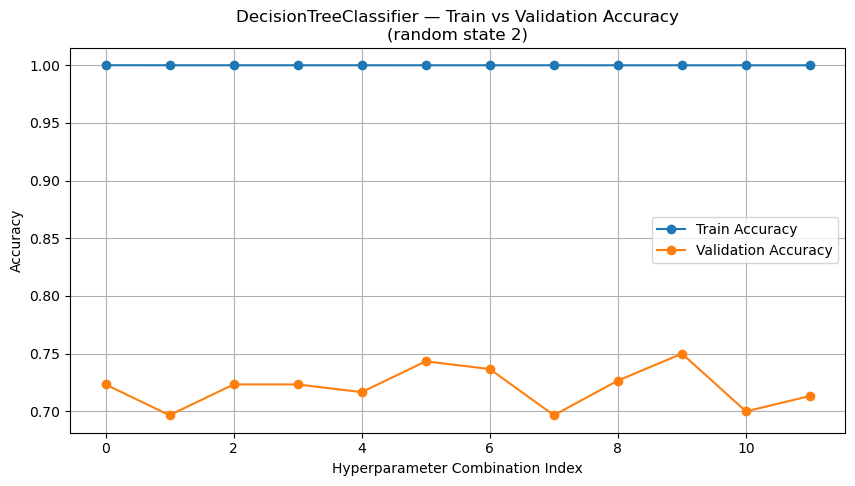

Test accuracy = 0.8833

Random State = 168 
Best params = {'max_depth': 7, 'min_samples_split': 5}
Best val accuracy = 0.9200


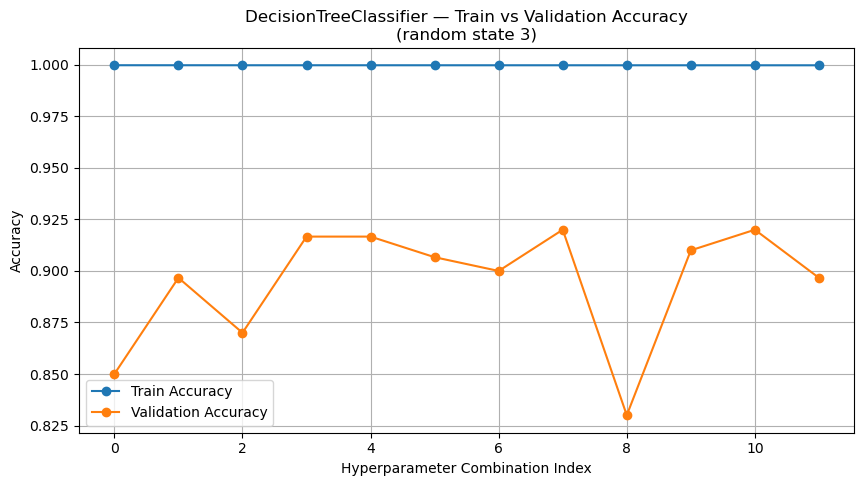

Test accuracy = 0.6500

Random State = 210 
Best params = {'max_depth': 5, 'min_samples_split': 2}
Best val accuracy = 0.8033


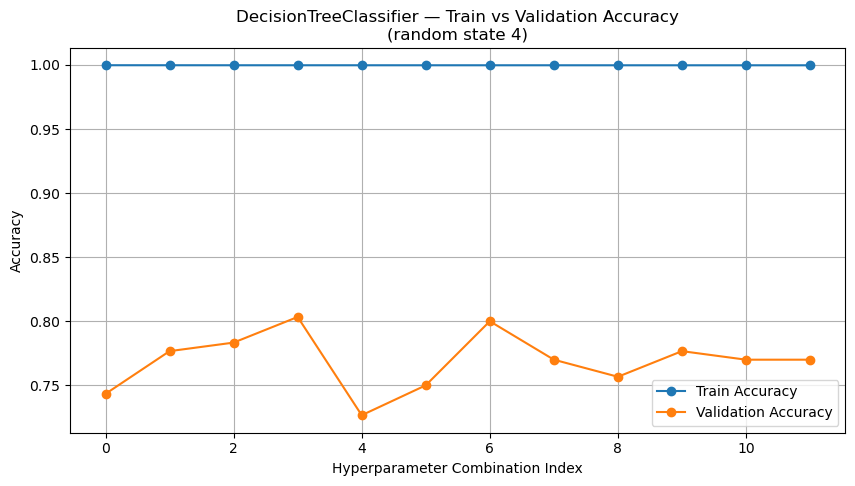

Test accuracy = 0.7167

FINAL RESULT
Test accuracies: [0.6166666666666667, 0.85, 0.8833333333333333, 0.65, 0.7166666666666667]
Mean Test Accuracy = 0.7433


In [133]:
param_grids = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10]
}

mean_acc, test_scores, best_params = run_model(
    DecisionTreeClassifier,
    param_grids,
    X, y, groups
)

#### 2.2 Random Forest


Random State = 42 
Best params = {'max_depth': 10, 'max_features': 0.25, 'n_estimators': 200}
Best val accuracy = 0.9067


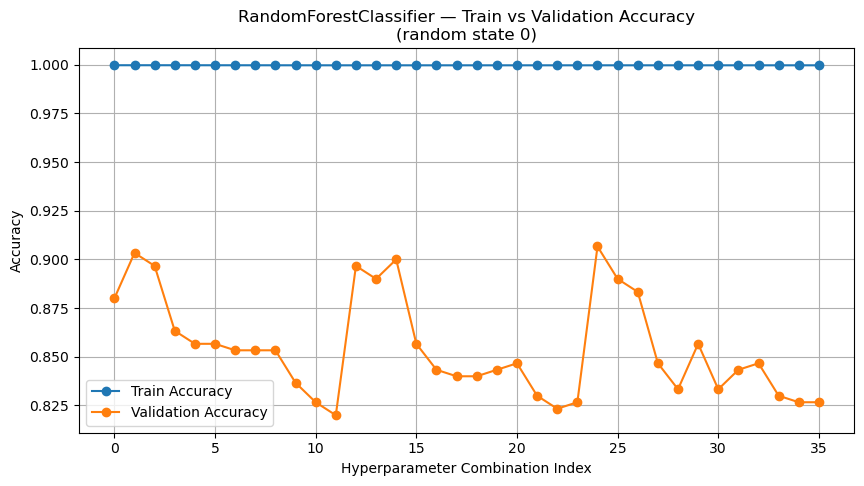

Test accuracy = 0.9000

Random State = 84 
Best params = {'max_depth': 3, 'max_features': 0.25, 'n_estimators': 200}
Best val accuracy = 0.9000


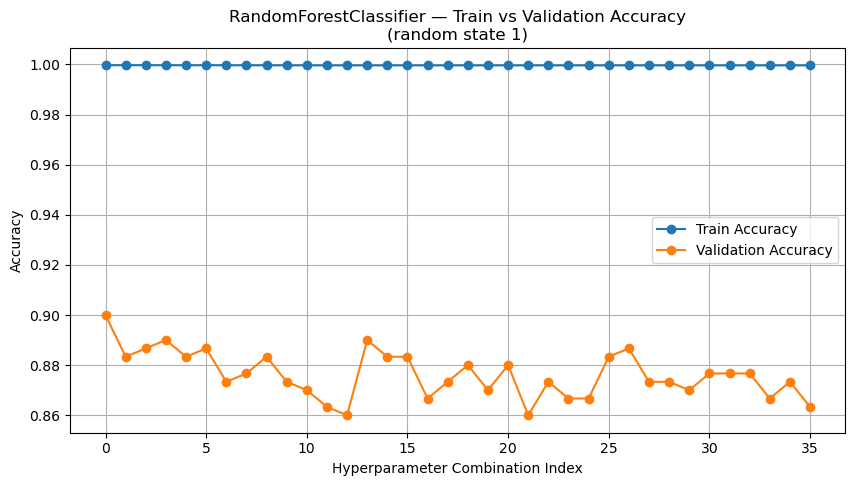

Test accuracy = 0.9333

Random State = 126 
Best params = {'max_depth': 5, 'max_features': 0.25, 'n_estimators': 200}
Best val accuracy = 0.8900


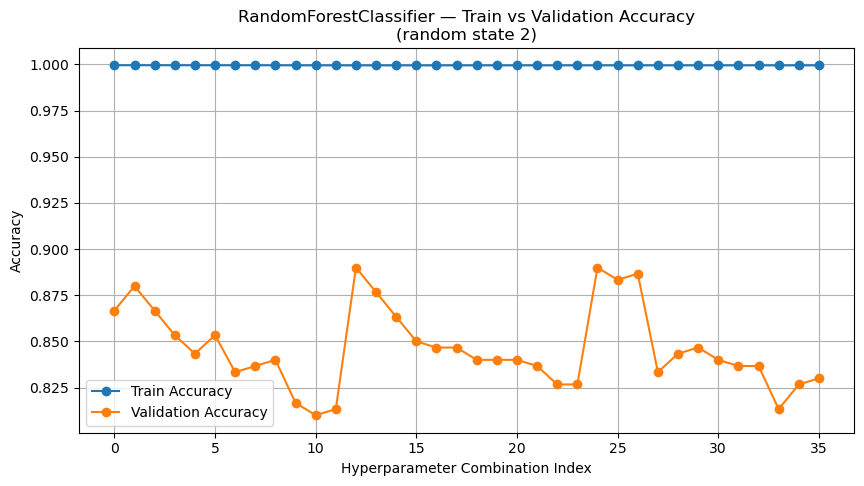

Test accuracy = 1.0000

Random State = 168 
Best params = {'max_depth': 5, 'max_features': 0.25, 'n_estimators': 500}
Best val accuracy = 0.9500


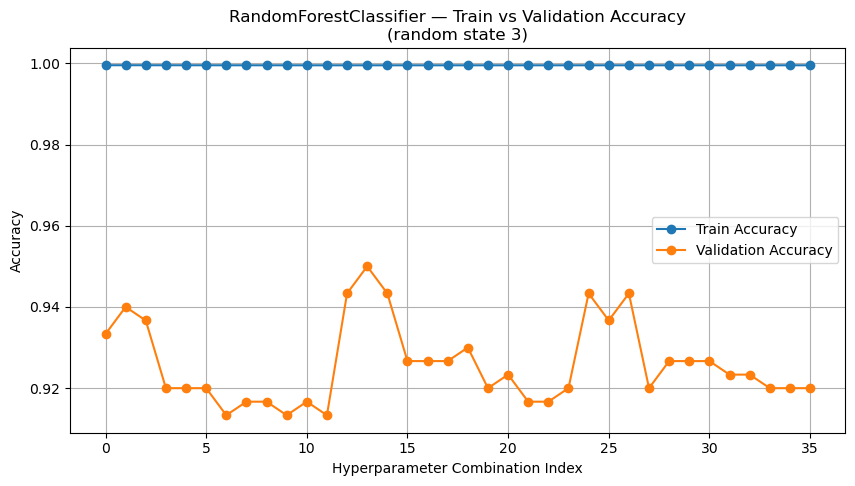

Test accuracy = 0.6833

Random State = 210 
Best params = {'max_depth': 10, 'max_features': 0.25, 'n_estimators': 1000}
Best val accuracy = 0.9067


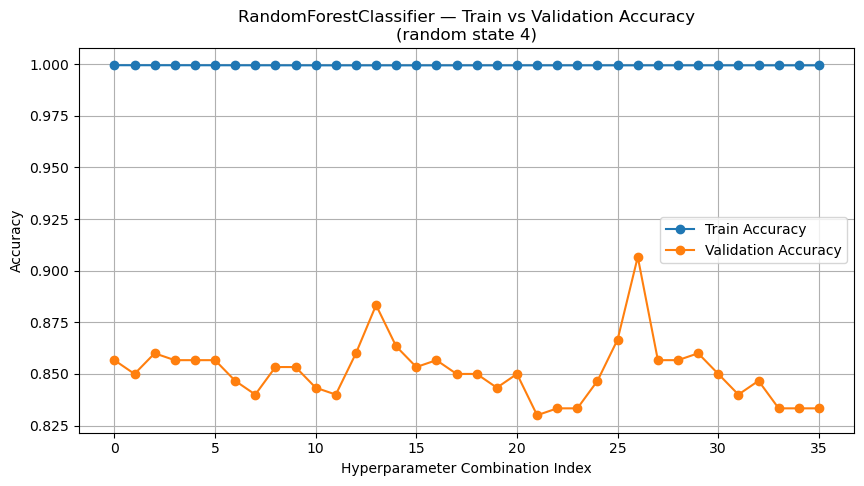

Test accuracy = 0.9500

FINAL RESULT
Test accuracies: [0.9, 0.9333333333333333, 1.0, 0.6833333333333333, 0.95]
Mean Test Accuracy = 0.8933


In [134]:
param_grids = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [3, 5, 10],
    "max_features": [0.25, 0.5, 0.75, 1.0]
}

mean_acc, test_scores, best_params = run_model(
    RandomForestClassifier,
    param_grids,
    X, y, groups
)

#### 2.3 XGBoost


Random State = 42 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}
Best val accuracy = 0.8700


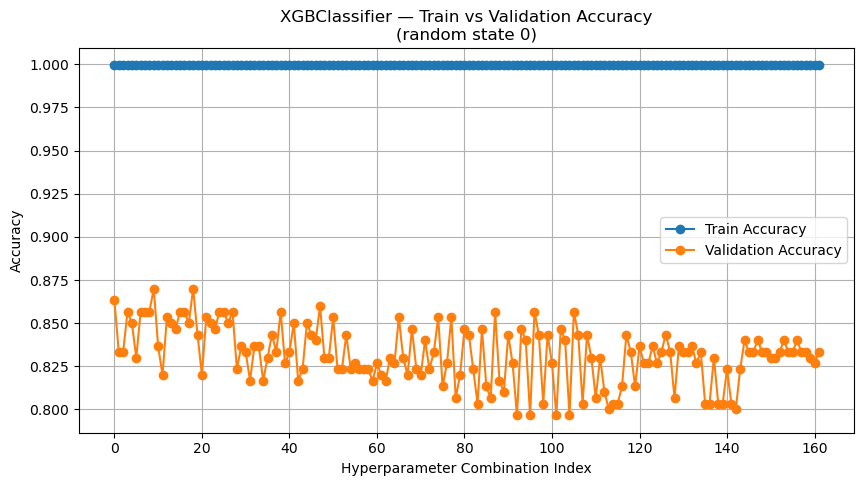

Test accuracy = 0.9667

Random State = 84 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Best val accuracy = 0.8700


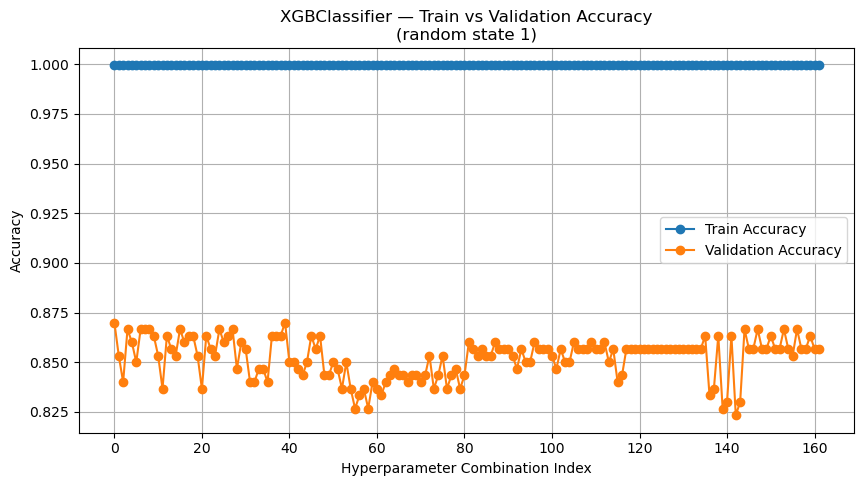

Test accuracy = 0.9333

Random State = 126 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Best val accuracy = 0.8700


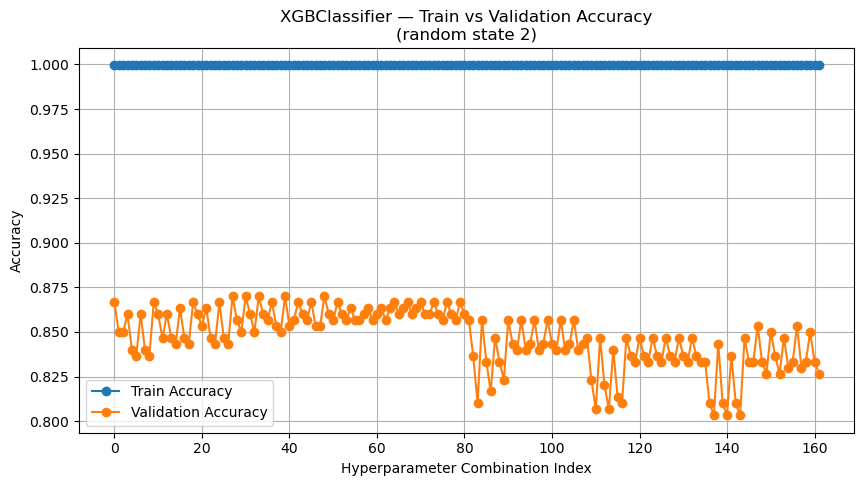

Test accuracy = 1.0000

Random State = 168 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.6}
Best val accuracy = 0.9500


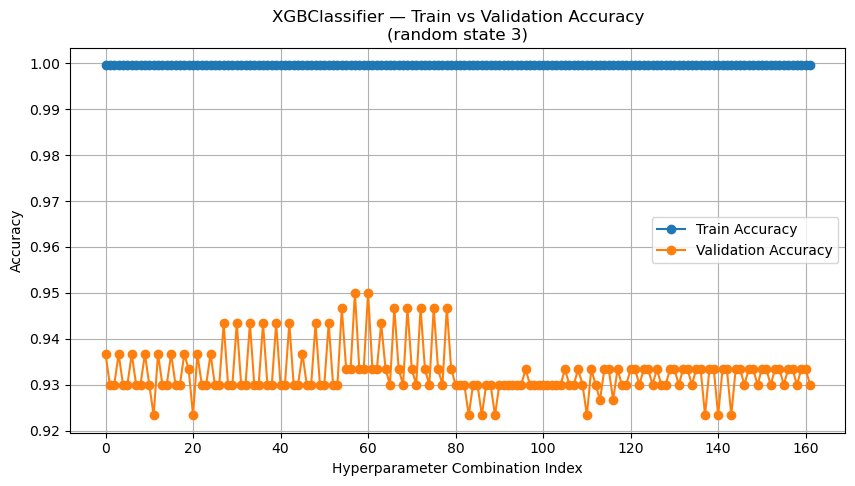

Test accuracy = 0.6500

Random State = 210 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800, 'subsample': 0.6}
Best val accuracy = 0.8533


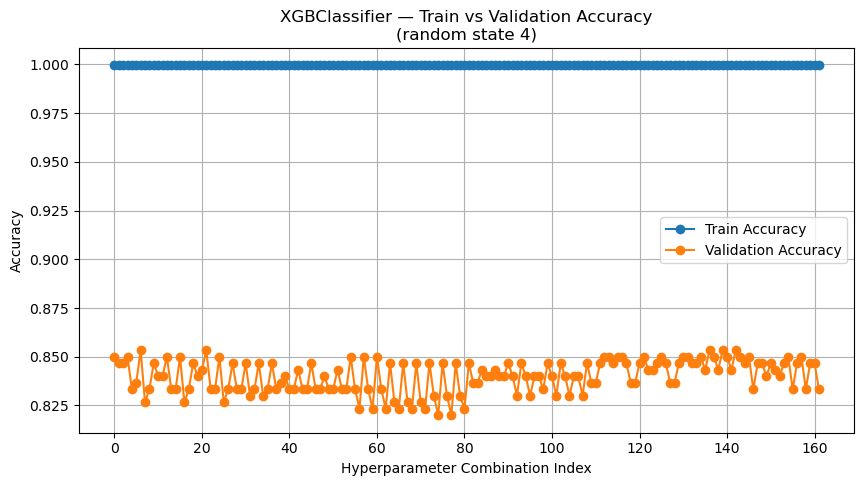

Test accuracy = 0.9833

FINAL RESULT
Test accuracies: [0.9666666666666667, 0.9333333333333333, 1.0, 0.65, 0.9833333333333333]
Mean Test Accuracy = 0.9067


In [135]:
y = df_prep["condition"] - 1

param_grids = {
     "n_estimators": [300, 500, 800],
        "max_depth": [3, 5, 10],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.6, 0.8, 0.9],
        "colsample_bytree": [0.7, 1.0]
}

mean_acc, test_scores, best_params = run_model(
    xgb.XGBClassifier,
    param_grids,
    X, y, groups
)

#### 2.4 SVC


Random State = 42 
Best params = {'C': np.float64(1.0), 'gamma': np.float64(0.01)}
Best val accuracy = 0.8067


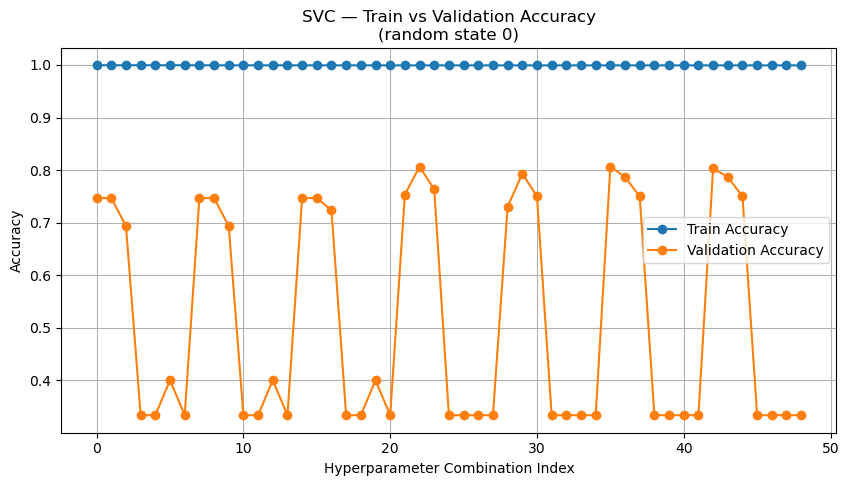

Test accuracy = 0.6333

Random State = 84 
Best params = {'C': np.float64(100.0), 'gamma': np.float64(0.001)}
Best val accuracy = 0.8633


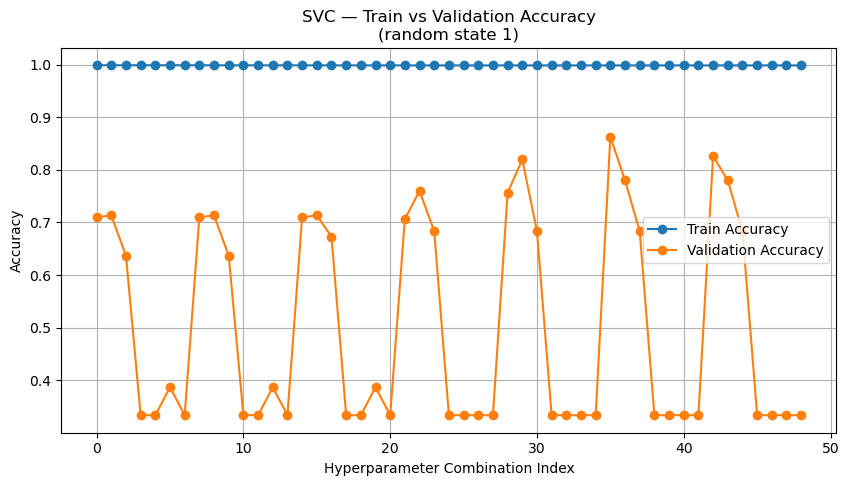

Test accuracy = 1.0000

Random State = 126 
Best params = {'C': np.float64(10.0), 'gamma': np.float64(0.01)}
Best val accuracy = 0.8900


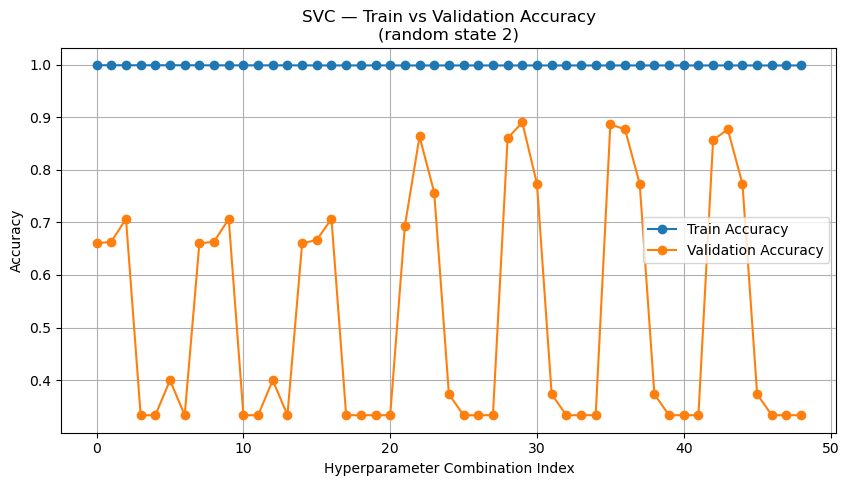

Test accuracy = 0.9167

Random State = 168 
Best params = {'C': np.float64(100.0), 'gamma': np.float64(0.001)}
Best val accuracy = 0.9400


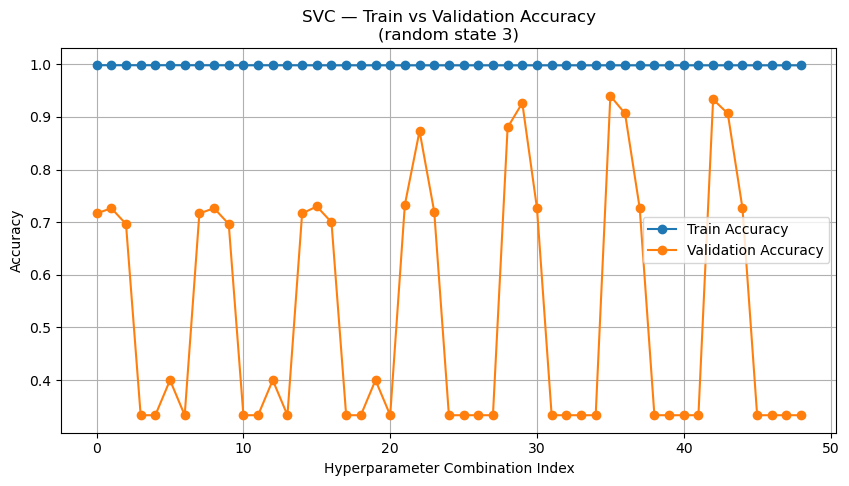

Test accuracy = 0.9500

Random State = 210 
Best params = {'C': np.float64(100.0), 'gamma': np.float64(0.001)}
Best val accuracy = 0.8900


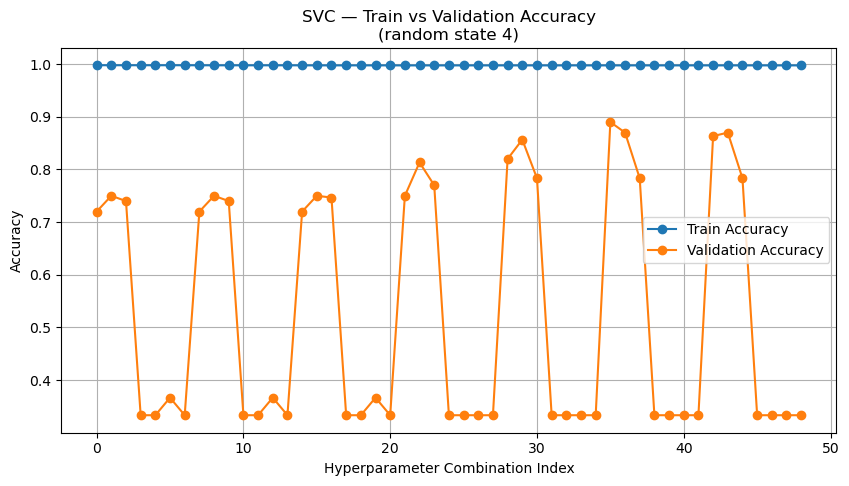

Test accuracy = 0.9167

FINAL RESULT
Test accuracies: [0.6333333333333333, 1.0, 0.9166666666666666, 0.95, 0.9166666666666666]
Mean Test Accuracy = 0.8833


In [136]:
param_grids = {
     "C": np.logspace(-3,3,7),
    "gamma": np.logspace(-3, 3, 7)

}

mean_acc, test_scores, best_params = run_model(
    SVC,
    param_grids,
    X, y, groups
)

#### 2.5 Logistic Regression


Random State = 42 
Best params = {'C': np.float64(0.01), 'max_iter': 5000}
Best val accuracy = 0.8233


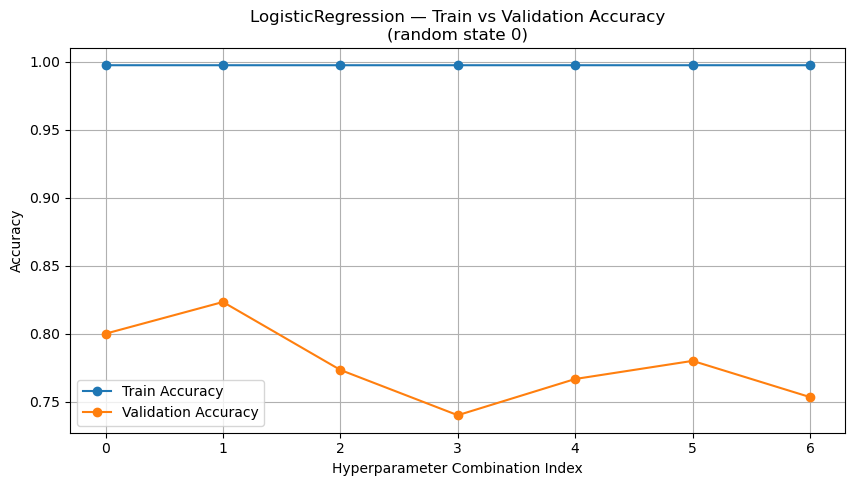

Test accuracy = 0.4667

Random State = 84 
Best params = {'C': np.float64(10.0), 'max_iter': 5000}
Best val accuracy = 0.7733


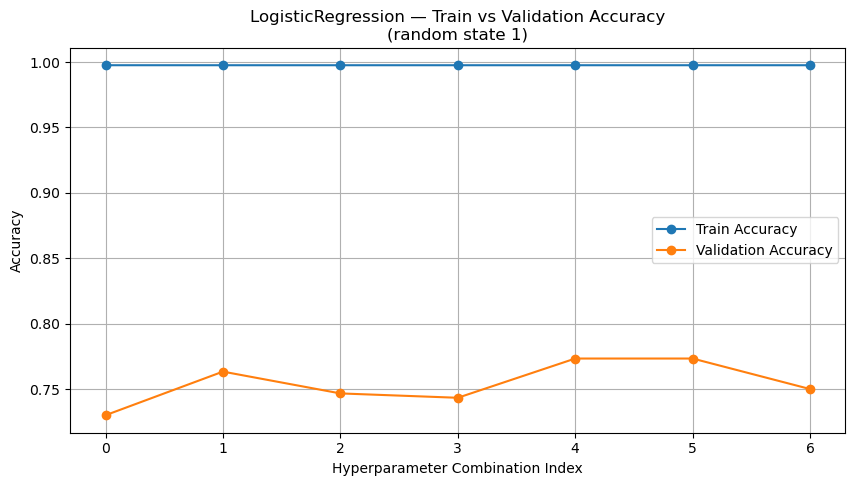

Test accuracy = 0.9667

Random State = 126 
Best params = {'C': np.float64(1.0), 'max_iter': 5000}
Best val accuracy = 0.8500


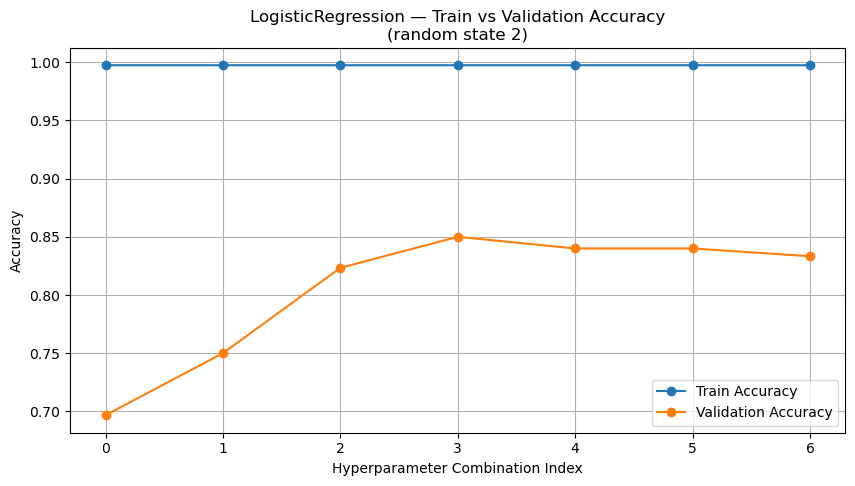

Test accuracy = 0.7333

Random State = 168 
Best params = {'C': np.float64(1.0), 'max_iter': 5000}
Best val accuracy = 0.8933


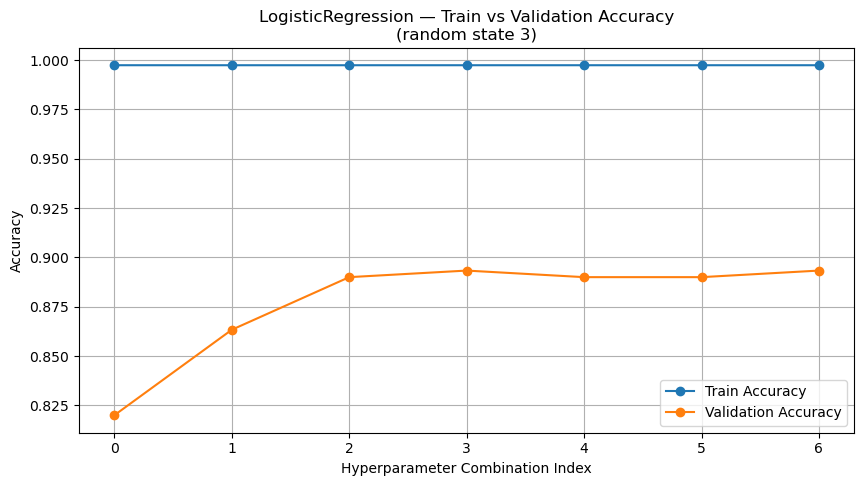

Test accuracy = 0.8500

Random State = 210 
Best params = {'C': np.float64(0.001), 'max_iter': 5000}
Best val accuracy = 0.8067


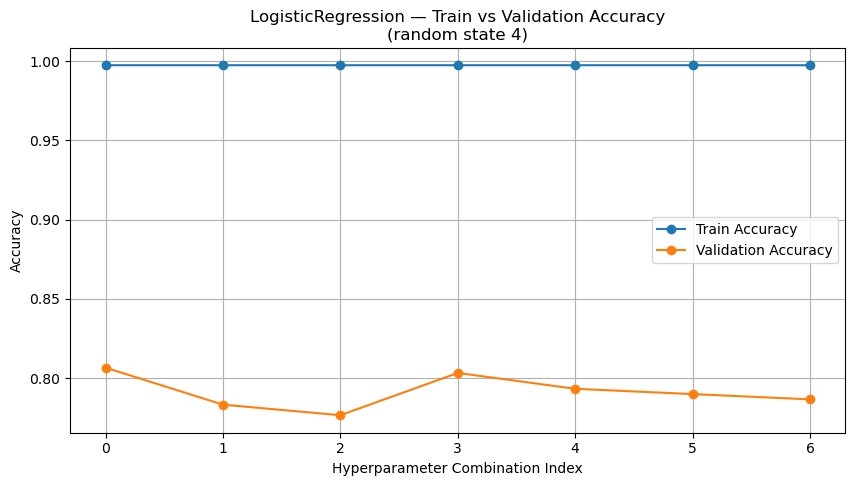

Test accuracy = 0.8000

FINAL RESULT
Test accuracies: [0.4666666666666667, 0.9666666666666667, 0.7333333333333333, 0.85, 0.8]
Mean Test Accuracy = 0.7633


In [137]:
param_grids = {
     "C": np.logspace(-3,3,7),
    "max_iter": [5000]

}

mean_acc, test_scores, best_params = run_model(
    LogisticRegression,
    param_grids,
    X, y, groups
)

### 3. Only left legs

In [32]:
X_left = df_prep[[
        'leg1_joint1_max_angle',
       'leg1_joint2_max_angle', 'leg1_joint3_max_angle',
        'leg1_joint1_mean_angle',
       'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
        'leg1_joint1_min_angle',
       'leg1_joint2_min_angle', 'leg1_joint3_min_angle',
        'leg1_joint1_range_angle',
       'leg1_joint2_range_angle', 'leg1_joint3_range_angle',
        'leg1_joint1_std_angle',
       'leg1_joint2_std_angle', 'leg1_joint3_std_angle'
             ]]

y_left = df_prep['condition']

#### 3.1 Decision Tree

In [33]:
param_grids = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10]
}

mean_acc, test_scores, best_params, results_per_rs, grid = group_ml_pipe(
    DecisionTreeClassifier,
    param_grids,
    X_left, y_left, groups
)


Random State = 42 
Best params = {'max_depth': 10, 'min_samples_split': 10}
Best val accuracy = 0.5333
Test accuracy = 0.5000

Random State = 84 
Best params = {'max_depth': 7, 'min_samples_split': 10}
Best val accuracy = 0.5467
Test accuracy = 0.2833

Random State = 126 
Best params = {'max_depth': 3, 'min_samples_split': 2}
Best val accuracy = 0.5467
Test accuracy = 0.5500

Random State = 168 
Best params = {'max_depth': 7, 'min_samples_split': 2}
Best val accuracy = 0.5733
Test accuracy = 0.2333

Random State = 210 
Best params = {'max_depth': 10, 'min_samples_split': 2}
Best val accuracy = 0.6000
Test accuracy = 0.3333

FINAL RESULT
Test accuracies: [0.5, 0.2833333333333333, 0.55, 0.23333333333333334, 0.3333333333333333]
Mean Test Accuracy = 0.3800


Using fixed min_samples_split = 10


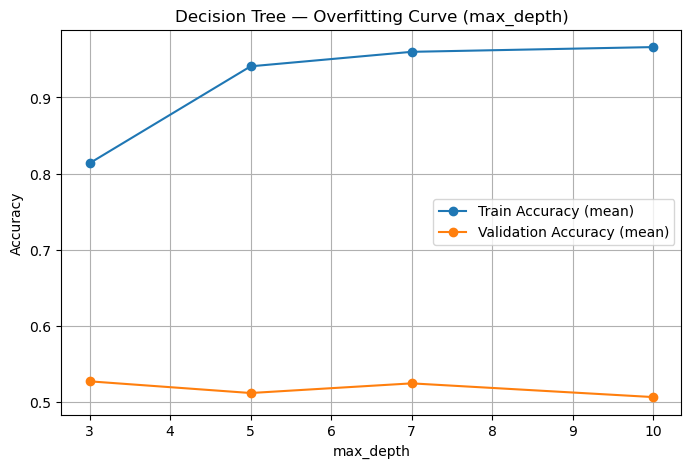

In [34]:
fixed_split = best_params[0]["min_samples_split"]
print("Using fixed min_samples_split =", fixed_split)

depth_values = param_grids["max_depth"]

train_curve = []
val_curve = []

for depth in depth_values:

    idx = [
        i for i, params in enumerate(grid)
        if params["max_depth"] == depth and params["min_samples_split"] == fixed_split
    ][0]

    train_mean = np.mean([rs["train_scores"][idx] for rs in results_per_rs])
    val_mean   = np.mean([rs["val_scores"][idx] for rs in results_per_rs])

    train_curve.append(train_mean)
    val_curve.append(val_mean)

plt.figure(figsize=(8,5))
plt.plot(depth_values, train_curve, marker='o', label="Train Accuracy (mean)")
plt.plot(depth_values, val_curve, marker='o', label="Validation Accuracy (mean)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree — Overfitting Curve (max_depth)")
plt.grid(True)
plt.legend()

plt.show()

#### deal with overfitting

In [35]:
param_grids = {
    "max_depth": [2, 3, 5],
    "min_samples_split": [10, 20, 50]
}

mean_acc, test_scores, best_params, results_per_rs, grid = group_ml_pipe(
    DecisionTreeClassifier,
    param_grids,
    X_left, y_left, groups
)


Random State = 42 
Best params = {'max_depth': 5, 'min_samples_split': 50}
Best val accuracy = 0.5167
Test accuracy = 0.5333

Random State = 84 
Best params = {'max_depth': 5, 'min_samples_split': 20}
Best val accuracy = 0.5733
Test accuracy = 0.3333

Random State = 126 
Best params = {'max_depth': 5, 'min_samples_split': 50}
Best val accuracy = 0.5933
Test accuracy = 0.6500

Random State = 168 
Best params = {'max_depth': 5, 'min_samples_split': 20}
Best val accuracy = 0.5700
Test accuracy = 0.4667

Random State = 210 
Best params = {'max_depth': 5, 'min_samples_split': 20}
Best val accuracy = 0.6200
Test accuracy = 0.3500

FINAL RESULT
Test accuracies: [0.5333333333333333, 0.3333333333333333, 0.65, 0.4666666666666667, 0.35]
Mean Test Accuracy = 0.4667


Using fixed min_samples_split = 50


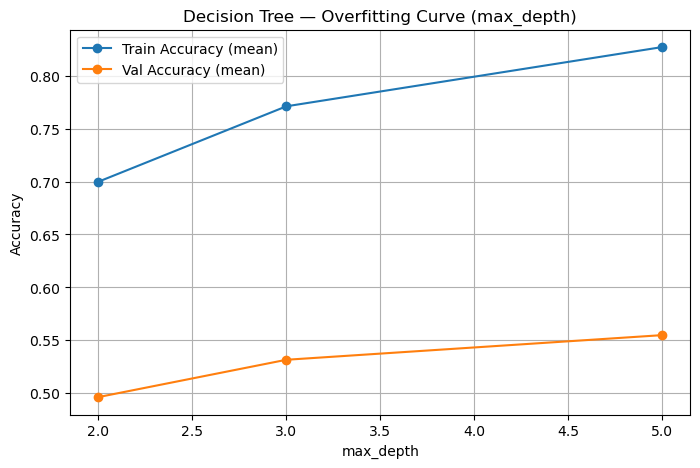

In [36]:
fixed_split = best_params[0]["min_samples_split"]
print("Using fixed min_samples_split =", fixed_split)

depth_values = param_grids["max_depth"]

train_curve = []
val_curve = []

for depth in depth_values:

    idx_list = [
        i for i, params in enumerate(grid)
        if params["max_depth"] == depth and params["min_samples_split"] == fixed_split
    ]

    if not idx_list:
        print(f"error: depth={depth}, split={fixed_split} ")
        continue

    idx = idx_list[0]

    train_mean = np.mean([rs["train_scores"][idx] for rs in results_per_rs])
    val_mean = np.mean([rs["val_scores"][idx] for rs in results_per_rs])

    train_curve.append(train_mean)
    val_curve.append(val_mean)

plt.figure(figsize=(8,5))
plt.plot(depth_values, train_curve, marker='o', label="Train Accuracy (mean)")
plt.plot(depth_values, val_curve, marker='o', label="Val Accuracy (mean)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree — Overfitting Curve (max_depth)")
plt.grid(True)
plt.legend()

save_path = "/Users/pengyitong/Documents/Brown/1030/gait_condition_recognition/figures/DT_overfitting_max_depth.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

In [37]:
import os, pickle

os.makedirs("results", exist_ok=True)

dt_payload = {
    "feature_set": "left_only",
    "model": "DecisionTree",
    "param_grid": param_grids,
    "mean_acc": mean_acc,
    "test_scores": test_scores,
    "best_params": best_params,
    "results_per_rs": results_per_rs,
    "grid": grid,
    "feature_names": X_left.columns.tolist()
}

with open("results/left_DT.pkl", "wb") as f:
    pickle.dump(dt_payload, f)

#### 3.2 Random Forest

In [43]:
param_grids = {
    "n_estimators": [200, 500, 1000],
    "max_depth": [3, 5, 10],
    "max_features": [0.25, 0.5, 0.75, 1.0]
}

mean_acc, test_scores, best_params, results_per_rs, grid = group_ml_pipe(
    RandomForestClassifier,
    param_grids,
    X_left, y_left, groups
)


Random State = 42 
Best params = {'max_depth': 10, 'max_features': 0.25, 'n_estimators': 200}
Best val accuracy = 0.4933
Test accuracy = 0.4000

Random State = 84 
Best params = {'max_depth': 10, 'max_features': 1.0, 'n_estimators': 1000}
Best val accuracy = 0.5733
Test accuracy = 0.6000

Random State = 126 
Best params = {'max_depth': 3, 'max_features': 0.75, 'n_estimators': 500}
Best val accuracy = 0.6133
Test accuracy = 0.5500

Random State = 168 
Best params = {'max_depth': 10, 'max_features': 0.5, 'n_estimators': 200}
Best val accuracy = 0.5600
Test accuracy = 0.2333

Random State = 210 
Best params = {'max_depth': 10, 'max_features': 0.25, 'n_estimators': 200}
Best val accuracy = 0.6000
Test accuracy = 0.5167

FINAL RESULT
Test accuracies: [0.4, 0.6, 0.55, 0.23333333333333334, 0.5166666666666667]
Mean Test Accuracy = 0.4600


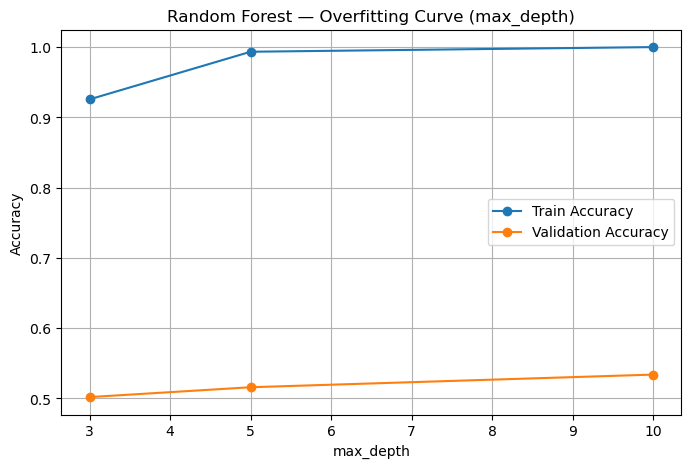

In [44]:
depth_values = param_grids["max_depth"]

train_curve = []
val_curve = []

for depth in depth_values:
    idx = [
        i for i, params in enumerate(grid)
        if params["max_depth"] == depth
    ][0]

    train_mean = np.mean([rs["train_scores"][idx] for rs in results_per_rs])
    val_mean   = np.mean([rs["val_scores"][idx] for rs in results_per_rs])

    train_curve.append(train_mean)
    val_curve.append(val_mean)

plt.figure(figsize=(8,5))
plt.plot(depth_values, train_curve, marker='o', label="Train Accuracy")
plt.plot(depth_values, val_curve, marker='o', label="Validation Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Random Forest — Overfitting Curve (max_depth)")
plt.grid(True)
plt.legend()

plt.show()

#### 模型太复杂，容易过拟合，修改超参数组合：

In [61]:
param_grids = {
     "n_estimators": [40, 50, 80],       
    "max_depth": [2, 3, 4],            
    "max_features": [3, 5, "sqrt"],      
    "min_samples_split": [30, 50, 70],   
    "min_samples_leaf": [15, 20, 25]  
}

mean_acc, test_scores, best_params, results_per_rs, grid = group_ml_pipe(
    RandomForestClassifier,
    param_grids,
    X_left, y_left, groups
)


Random State = 42 
Best params = {'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 70, 'n_estimators': 50}
Best val accuracy = 0.5167
Test accuracy = 0.3667

Random State = 84 
Best params = {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 40}
Best val accuracy = 0.6067
Test accuracy = 0.5333

Random State = 126 
Best params = {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 25, 'min_samples_split': 70, 'n_estimators': 50}
Best val accuracy = 0.6500
Test accuracy = 0.5500

Random State = 168 
Best params = {'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 40}
Best val accuracy = 0.5433
Test accuracy = 0.3333

Random State = 210 
Best params = {'max_depth': 2, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 40}
Best val accuracy = 0.5933
Test accuracy = 0.5333

FINAL RESULT
Test accuracies: [0.36666666666666664,

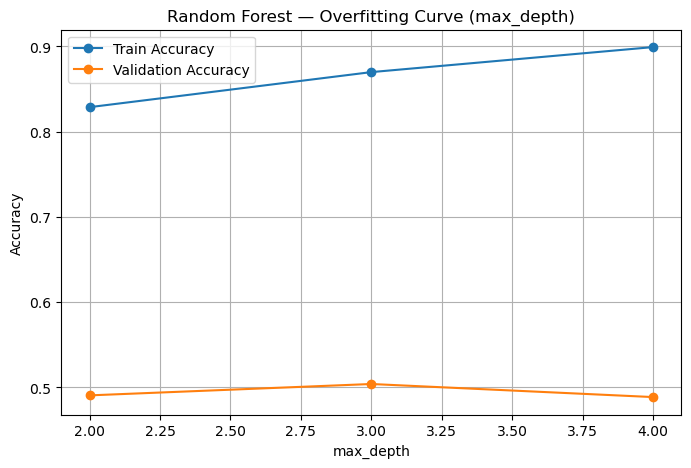

In [46]:
depth_values = param_grids["max_depth"]

train_curve = []
val_curve = []

for depth in depth_values:
    idx = [
        i for i, params in enumerate(grid)
        if params["max_depth"] == depth
    ][0]

    train_mean = np.mean([rs["train_scores"][idx] for rs in results_per_rs])
    val_mean   = np.mean([rs["val_scores"][idx] for rs in results_per_rs])

    train_curve.append(train_mean)
    val_curve.append(val_mean)

plt.figure(figsize=(8,5))
plt.plot(depth_values, train_curve, marker='o', label="Train Accuracy")
plt.plot(depth_values, val_curve, marker='o', label="Validation Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Random Forest — Overfitting Curve (max_depth)")
plt.grid(True)
plt.legend()
save_path = "/Users/pengyitong/Documents/Brown/1030/gait_condition_recognition/figures/RF_overfitting_max_depth.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

In [62]:
rf_payload = {
    "feature_set": "left_only",
    "model": "RandomForest",
    "param_grid": param_grids,
    "mean_acc": mean_acc,
    "test_scores": test_scores,
    "best_params": best_params,
    "results_per_rs": results_per_rs,
    "grid": grid,
    "feature_names": X_left.columns.tolist()
}

with open("results/left_RF.pkl", "wb") as f:
    pickle.dump(rf_payload, f)

#### 3.3 XGBoost

In [49]:
from sklearn.model_selection import train_test_split

In [52]:
y_xgb = df_prep["condition"] - 1

param_grids = {
     "n_estimators": [500],
        "max_depth": [3, 5, 10],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.6, 0.8, 0.9],
        "colsample_bytree": [0.7, 1.0]
}

mean_acc, test_scores, best_params, results_per_rs, grid, evals_results = xgb_pipe(
    param_grids,
    X_left, y_xgb, groups
)


Random State = 42 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.6}
Best val accuracy = 0.5433
Test accuracy = 0.4500

Random State = 84 
Best params = {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.9}
Best val accuracy = 0.6233
Test accuracy = 0.4833

Random State = 126 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best val accuracy = 0.6000
Test accuracy = 0.6000

Random State = 168 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.6}
Best val accuracy = 0.5967
Test accuracy = 0.4000

Random State = 210 
Best params = {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best val accuracy = 0.6600
Test accuracy = 0.4167

FINAL RESULT
Test accuracies: [0.45, 0.48333333333333334,

#### 过拟合调整

In [63]:
y_xgb = df_prep["condition"] - 1

param_grids = {
    "n_estimators": [200, 300, 400],
    "max_depth": [2, 3],
    "learning_rate": [0.005, 0.01],
    "subsample": [0.5, 0.7],
    "min_child_weight": [5, 10],
    "colsample_bytree": [0.3, 0.5]    
}

mean_acc, test_scores, best_params, results_per_rs, grid, evals_results = xgb_pipe(
    param_grids,
    X_left, y_xgb, groups
)


Random State = 42 
Best params = {'colsample_bytree': 0.3, 'learning_rate': 0.005, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7}
Best val accuracy = 0.5333
Test accuracy = 0.3833

Random State = 84 
Best params = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.7}
Best val accuracy = 0.5600
Test accuracy = 0.4833

Random State = 126 
Best params = {'colsample_bytree': 0.5, 'learning_rate': 0.005, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.7}
Best val accuracy = 0.6067
Test accuracy = 0.5333

Random State = 168 
Best params = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.5}
Best val accuracy = 0.5200
Test accuracy = 0.4167

Random State = 210 
Best params = {'colsample_bytree': 0.3, 'learning_rate': 0.005, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 400, 'subsam

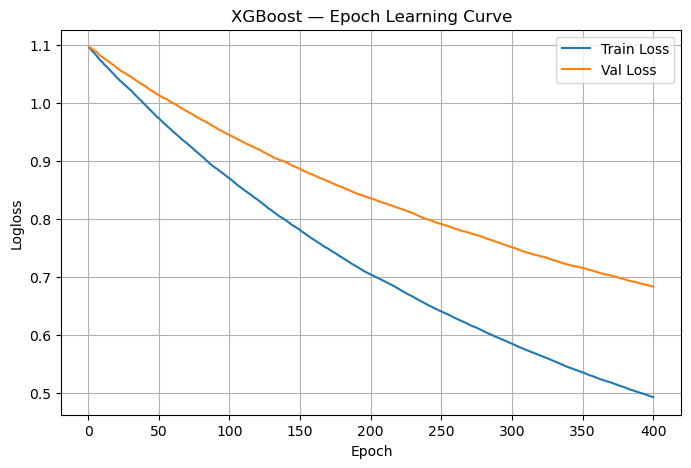

In [54]:
evals = evals_results[0]

train_loss = evals["validation_0"]["mlogloss"]
val_loss   = evals["validation_1"]["mlogloss"]

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, train_loss, label="Train Loss")
plt.plot(epochs, val_loss,   label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Logloss")
plt.title("XGBoost — Epoch Learning Curve")
plt.grid(True)
plt.legend()

save_path = "/Users/pengyitong/Documents/Brown/1030/gait_condition_recognition/figures/XGB_epoch_curve.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

In [64]:
xgb_payload = {
    "feature_set": "left_only",
    "model": "XGBoost",
    "param_grid": param_grids,
    "mean_acc": mean_acc,
    "test_scores": test_scores,
    "best_params": best_params,
    "results_per_rs": results_per_rs,
    "grid": grid,
    "feature_names": X_left.columns.tolist()
}

with open("results/left_XGB.pkl", "wb") as f:
    pickle.dump(xgb_payload, f)

Mean Test Accuracy: 0.45666666666666667
Std of Test Accuracy: 0.052281290471193724


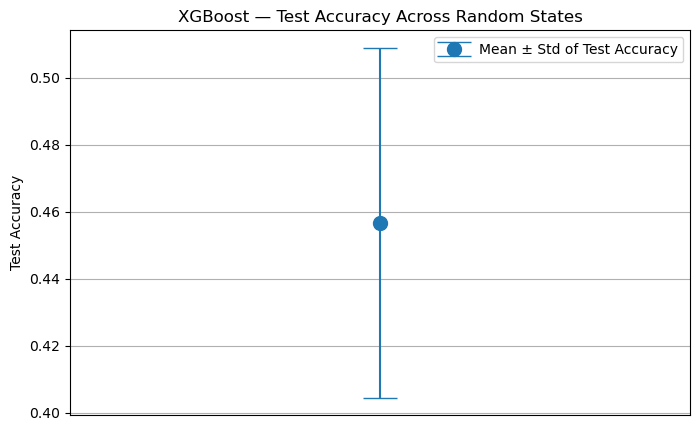

In [173]:
mean_score = np.mean(test_scores)
std_score = np.std(test_scores)

print("Mean Test Accuracy:", mean_score)
print("Std of Test Accuracy:", std_score)

plt.figure(figsize=(8, 5))
plt.errorbar(
    x=[0], 
    y=[mean_score], 
    yerr=[std_score], 
    fmt='o',
    capsize=12,
    markersize=10,
    label="Mean ± Std of Test Accuracy"
)

plt.title("XGBoost — Test Accuracy Across Random States")
plt.ylabel("Test Accuracy")
plt.xticks([])  # we don't need x-axis ticks
plt.grid(True)
plt.legend()
plt.show()

#### 3.4 SVC

In [56]:
param_grids = {
     "C": np.logspace(-3,3,7),
    "gamma": np.logspace(-3, 3, 7)

}

mean_acc, test_scores, best_params, results_per_rs, grid = group_ml_pipe(
    SVC,
    param_grids,
    X_left, y_left, groups
)


Random State = 42 
Best params = {'C': np.float64(1000.0), 'gamma': np.float64(0.001)}
Best val accuracy = 0.6067
Test accuracy = 0.4333

Random State = 84 
Best params = {'C': np.float64(100.0), 'gamma': np.float64(0.001)}
Best val accuracy = 0.6367
Test accuracy = 0.6500

Random State = 126 
Best params = {'C': np.float64(1000.0), 'gamma': np.float64(0.001)}
Best val accuracy = 0.6200
Test accuracy = 0.7833

Random State = 168 
Best params = {'C': np.float64(1000.0), 'gamma': np.float64(0.01)}
Best val accuracy = 0.5733
Test accuracy = 0.6667

Random State = 210 
Best params = {'C': np.float64(1000.0), 'gamma': np.float64(0.001)}
Best val accuracy = 0.6633
Test accuracy = 0.4333

FINAL RESULT
Test accuracies: [0.43333333333333335, 0.65, 0.7833333333333333, 0.6666666666666666, 0.43333333333333335]
Mean Test Accuracy = 0.5933


C = 1000      # 最大值
gamma = 0.001 # 最小值

In [58]:
param_grids = {
    "C": np.logspace(-1, 2, 4), 
    "gamma": np.array([1e-4, 3e-4, 1e-3, 3e-3, 1e-2])
}

mean_acc, test_scores, best_params, results_per_rs, grid = group_ml_pipe(
    SVC,
    param_grids,
    X_left, y_left, groups
)


Random State = 42 
Best params = {'C': np.float64(100.0), 'gamma': np.float64(0.003)}
Best val accuracy = 0.5933
Test accuracy = 0.4667

Random State = 84 
Best params = {'C': np.float64(100.0), 'gamma': np.float64(0.001)}
Best val accuracy = 0.6367
Test accuracy = 0.6500

Random State = 126 
Best params = {'C': np.float64(10.0), 'gamma': np.float64(0.003)}
Best val accuracy = 0.6067
Test accuracy = 0.5667

Random State = 168 
Best params = {'C': np.float64(100.0), 'gamma': np.float64(0.003)}
Best val accuracy = 0.5733
Test accuracy = 0.7667

Random State = 210 
Best params = {'C': np.float64(100.0), 'gamma': np.float64(0.01)}
Best val accuracy = 0.6300
Test accuracy = 0.3667

FINAL RESULT
Test accuracies: [0.4666666666666667, 0.65, 0.5666666666666667, 0.7666666666666667, 0.36666666666666664]
Mean Test Accuracy = 0.5633


Fixed gamma = 0.003


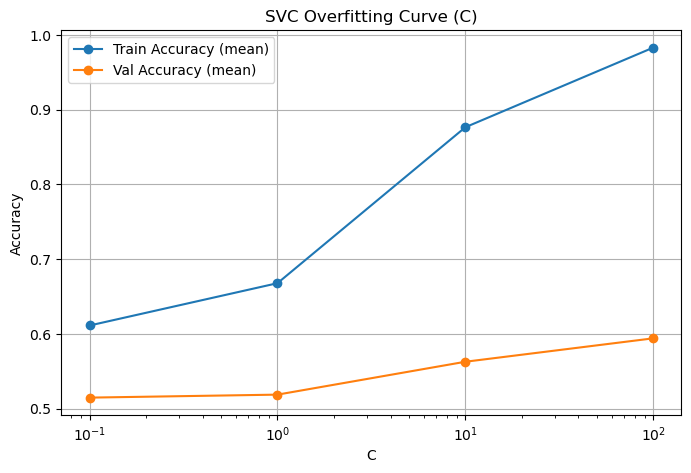

In [59]:
grid = list(ParameterGrid(param_grids))

from collections import Counter
gamma_fixed = Counter([bp["gamma"] for bp in best_params]).most_common(1)[0][0]

print("Fixed gamma =", gamma_fixed)

C_values = sorted(param_grids["C"])

indices = []
for C in C_values:
    for i, g in enumerate(grid):
        if g["C"] == C and g["gamma"] == gamma_fixed:
            indices.append(i)
            break

# print("Indices for overfitting curve:", indices)

train_curve = []
val_curve = []

for idx in indices:
    train_mean = np.mean([rs["train_scores"][idx] for rs in results_per_rs])
    val_mean   = np.mean([rs["val_scores"][idx]   for rs in results_per_rs])
    train_curve.append(train_mean)
    val_curve.append(val_mean)

plt.figure(figsize=(8,5))
plt.plot(C_values, train_curve, marker="o", label="Train Accuracy (mean)")
plt.plot(C_values, val_curve, marker="o", label="Val Accuracy (mean)")
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVC Overfitting Curve (C)")
plt.grid(True)
plt.legend()

save_path = "/Users/pengyitong/Documents/Brown/1030/gait_condition_recognition/figures/SVC_overfitting_C.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

In [60]:
svc_payload = {
    "feature_set": "left_only",
    "model": "SVC",
    "param_grid": param_grids,
    "mean_acc": mean_acc,
    "test_scores": test_scores,
    "best_params": best_params,
    "results_per_rs": results_per_rs,
    "grid": grid,
    "feature_names": X_left.columns.tolist()
}

with open("results/left_SVC.pkl", "wb") as f:
    pickle.dump(svc_payload, f)

#### 3.5 Logistic Regression

In [65]:
param_grids = {
     "C": np.logspace(-3,3,7),
    "max_iter": [5000]
}

mean_acc, test_scores, best_params, results_per_rs, grid = group_ml_pipe(
    LogisticRegression,
    param_grids,
    X_left, y_left, groups
)


Random State = 42 
Best params = {'C': np.float64(1000.0), 'max_iter': 5000}
Best val accuracy = 0.6100
Test accuracy = 0.6333

Random State = 84 
Best params = {'C': np.float64(100.0), 'max_iter': 5000}
Best val accuracy = 0.6600
Test accuracy = 0.7333

Random State = 126 
Best params = {'C': np.float64(1.0), 'max_iter': 5000}
Best val accuracy = 0.6600
Test accuracy = 0.6500

Random State = 168 
Best params = {'C': np.float64(1000.0), 'max_iter': 5000}
Best val accuracy = 0.6400
Test accuracy = 0.6000

Random State = 210 
Best params = {'C': np.float64(10.0), 'max_iter': 5000}
Best val accuracy = 0.6667
Test accuracy = 0.4500

FINAL RESULT
Test accuracies: [0.6333333333333333, 0.7333333333333333, 0.65, 0.6, 0.45]
Mean Test Accuracy = 0.6133


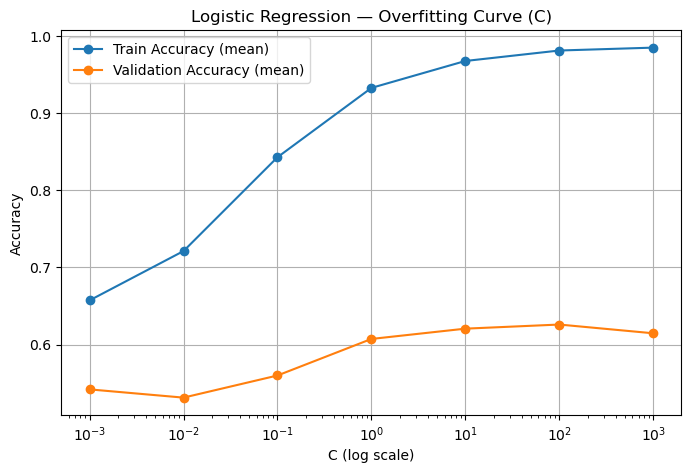

In [237]:
train_matrix = np.array([r["train_scores"] for r in results_per_rs])
val_matrix   = np.array([r["val_scores"]   for r in results_per_rs])

train_mean = train_matrix.mean(axis=0)
val_mean   = val_matrix.mean(axis=0)

C_values = [params["C"] for params in grid]

plt.figure(figsize=(8,5))
plt.plot(C_values, train_mean, marker='o', label="Train Accuracy (mean)")
plt.plot(C_values, val_mean,   marker='o', label="Validation Accuracy (mean)")
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("Logistic Regression — Overfitting Curve (C)")
plt.grid(True)
plt.legend()

save_path = "/Users/pengyitong/Documents/Brown/1030/gait_condition_recognition/figures/LR_overfitting_C.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

In [66]:
lr_payload = {
    "feature_set": "left_only",
    "model": "LogisticRegression",
    "param_grid": param_grids,
    "mean_acc": mean_acc,
    "test_scores": test_scores,
    "best_params": best_params,
    "results_per_rs": results_per_rs,
    "grid": grid,
    "feature_names": X_left.columns.tolist()
}

with open("results/left_LR.pkl", "wb") as f:
    pickle.dump(lr_payload, f)

In [76]:
# best_model = final_models["Logistic Regression"]
best_model = final_models["XGBoost"]
feature_names = X_test.columns.tolist()
nr_runs = 10
perm_results = pd.DataFrame(index=feature_names, columns=["baseline_acc", "shuffled_mean", "shuffled_std"])

baseline_acc = best_model.score(X_test, y_test)
print("Baseline accuracy:", baseline_acc)

for f in feature_names:
    print(f"\nShuffling feature: {f}")
    
    accs = []
    for r in range(nr_runs):
        X_shuffled = X_test.copy()
        X_shuffled[f] = np.random.permutation(X_shuffled[f].values)
        accs.append(best_model.score(X_shuffled, y_test))
    
    perm_results.loc[f, "baseline_acc"]   = baseline_acc
    perm_results.loc[f, "shuffled_mean"]  = np.mean(accs)
    perm_results.loc[f, "shuffled_std"]   = np.std(accs)

    print(" → Shuffled accuracy:", np.mean(accs), " ± ", np.std(accs))


Baseline accuracy: 1.0

Shuffling feature: leg1_joint1_max_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg1_joint2_max_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg1_joint3_max_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg2_joint1_max_angle
 → Shuffled accuracy: 0.7766666666666666  ±  0.03887301263230201

Shuffling feature: leg2_joint2_max_angle
 → Shuffled accuracy: 0.7333333333333333  ±  0.04472135954999579

Shuffling feature: leg2_joint3_max_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg1_joint1_mean_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg1_joint2_mean_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg1_joint3_mean_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg2_joint1_mean_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg2_joint2_mean_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg2_joint3_mean_angle
 → Shuffled accuracy: 1.0  ±  0

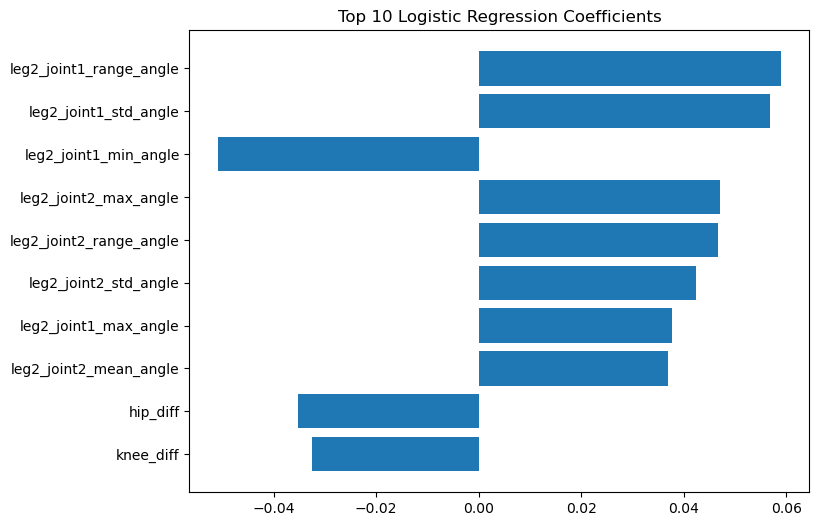

In [74]:
logreg = final_models["Logistic Regression"]
coef = logreg.named_steps["clf"].coef_[0]

features = X.columns

idx = np.argsort(np.abs(coef))

plt.figure(figsize=(8,6))
plt.barh(features[idx][-10:], coef[idx][-10:])
plt.title("Top 10 Logistic Regression Coefficients")
plt.show()

In [98]:
print(shap_vals[0])
        # X_test.iloc[idx],

[-4.9881788e-04  0.0000000e+00 -7.1261398e-05  2.8876669e-04
 -1.1938831e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -2.1231300e-04  2.6165514e-04  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -2.4374417e-04
 -8.1554073e-04  9.7296601e-05 -2.9364115e-01  1.6775588e-04
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -9.5939934e-02  1.4692050e-04  0.0000000e+00 -2.9569520e-02
 -1.0969076e-02]


In [97]:
import shap

best_model = final_models["XGBoost"]
xgb_clf = best_model.named_steps["clf"]
X_test_scaled = best_model.named_steps["scaler"].transform(X_test)

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer(X_test_scaled)

target_class = 1 #knee
# target_class = 2 #ankle

# 取对应 class 的 shap value
base_value = explainer.expected_value[target_class]
shap_vals = shap_values.values[:, :, target_class]

shap.initjs()

# indices = [0, 5, 10]
indices = [10, 20, 50]

for idx in indices:
    print(f"\nindex {idx}:")
    
    display(
        shap.force_plot(
            base_value,
            shap_vals[idx],
            X_test.iloc[idx],
            feature_names=X.columns,
        )
    )


index 10:



index 20:



index 50:
